In [2]:
import geopandas as gp
import numpy as np
import pandas as pd
import descartes as ds
import matplotlib.pyplot as plt
import json
from matplotlib.colors import TwoSlopeNorm
from shapely.geometry import Polygon
import seaborn as sns
import xlrd
import datetime
import gmplot

NOTA: Antes de empezar a correr el código asegurate de tener instaladas todas las librerías que aquí aparecen para no generar errores de código.
Probablemente las que tengas que instalar porque no vienen de defecto son shapely, seaborn,xlrd, geopandas, gmplot y tal vez datetime.

---
# Proyecto 2. Análisis de mercado de ropa de tallas extra (parte 2).
---

# <h1 align="center">Nuevo León</h1> 

### 1. Lectura del mapa de trabajo.


In [3]:
estado = "NUEVOLEON2.shp"
map_df = gp.read_file(estado)

### 2. Lectura de las bases de datos de las ventas por estado.

In [4]:
v19 = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/Balance-comercial-neto-2019.csv')
v19['Municipality ID'] = v19['Municipality ID'].apply(lambda x: x - 19000 )

### 3. Algunos datos se encontraban vaciós con NAN, por lo que se rellenaron con ceros ya que se interpretaba como valores nulos para colorearse dentro del mapa.

In [5]:
new_map = map_df.merge(v19, how='left', left_on='NOM_MUN', right_on='Municipality')
new_map['Trade Value'] = new_map['Trade Value'].fillna(0)
new_map['Trade Value'] = new_map['Trade Value'].fillna(0)

In [6]:
new_map['coords'] = new_map['geometry'].apply(lambda x: x.representative_point().coords[:])
new_map['coords'] = [coords[0] for coords in new_map['coords']]

In [7]:
# Como los valores de ventas son demasiado grandes, estamos hablando de millones de dolares, vamos
# a dividir toda la columna entre 1 Millón para que se puedan interpretar mejor los datos.
new_map['Trade Value'] = new_map['Trade Value'].apply(lambda x: x/1000000)


Nota: Como dividimos entre 1 Millón nuestra variable de interés, quiere decir que los resultados que nos arroje serán millones. Si la tabla de color dice 100, al interpretarse la cantidad correcta sería 100 Millones.


### 4. Ahora si, vamos a visualizar nuestro mapa.

<ipython-input-8-59568738db89>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = new_map['NOM_MUN'][i], xy = new_map['coords'][i],horizontalalignment='center',weight='bold',fontsize = 7).set_color('k')


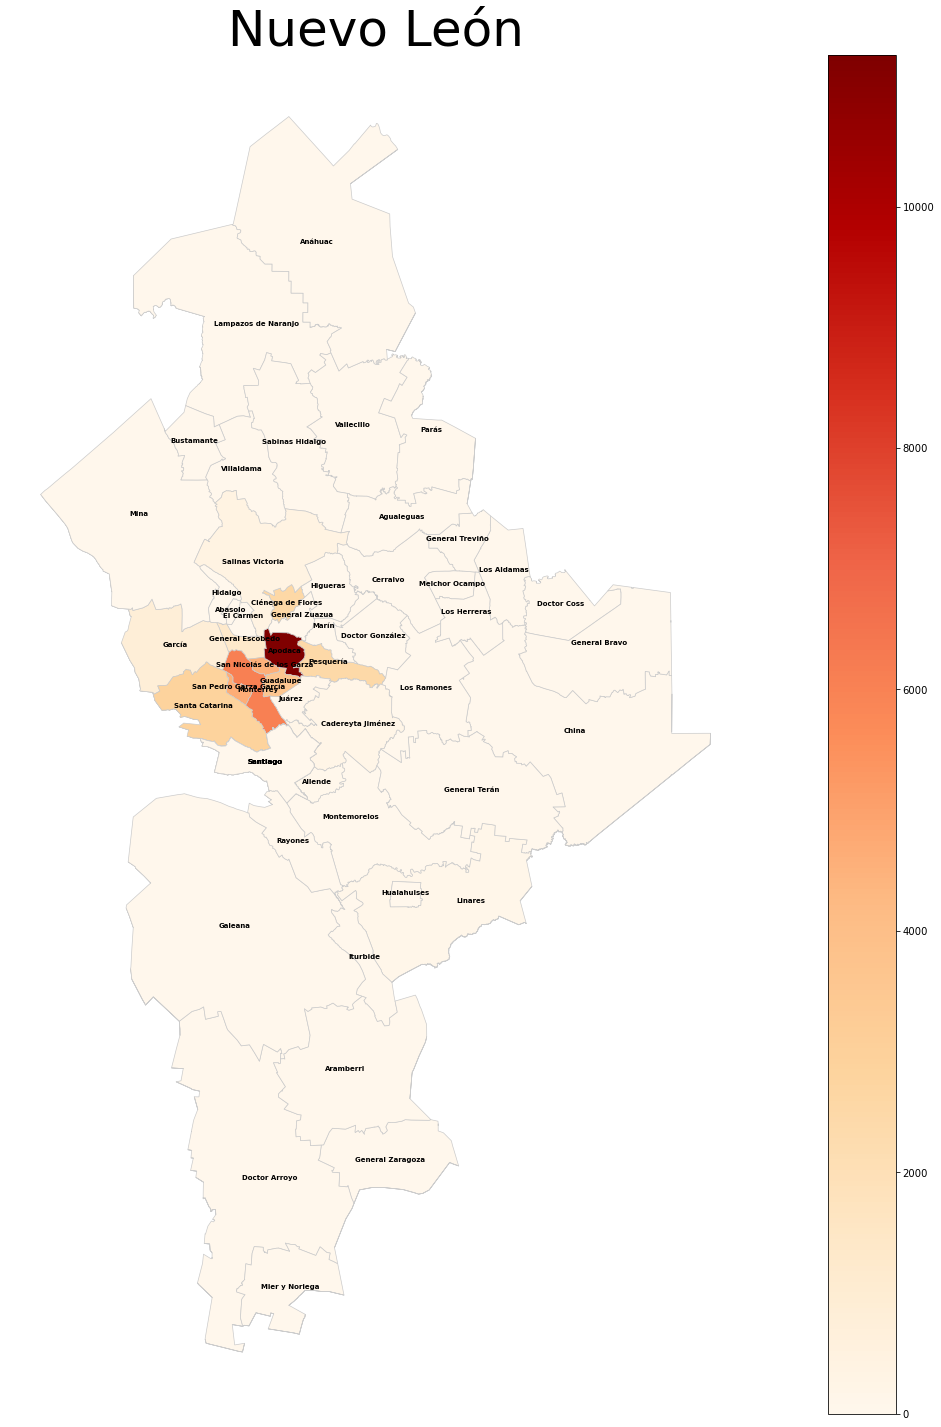

In [8]:
# Selecionamos la columna de interés, en este caso fue Trade Value dentro de la base de datos.
variable = 'Trade Value'
# Calculamos los valores máximo y mínimo dentro de la columna selecionada para la escala de colres.
vmin, vmax = new_map[variable].min(), new_map[variable].max()
# Creamos el espacio de trabajo para imprimir la figura en la pantalla.
fig, ax = plt.subplots(1, figsize=(30, 25))
# Quitamos los axis
ax.axis('off')
# Agregamos un título dentro de la figura con una orientación espacial y un tipo de fuente.
ax.set_title('Nuevo León', fontdict={'fontsize': '50', 'fontweight' : '3'})
# Creamos una barra de colores o selecionamos una de las ya existentes en matplotlib y la normalizamos al valor máximo y mínimo.
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Aplicamos el siguiente comando para evitar problemas con la paleta de colores.
sm.set_array([]) 
# Agregamos la barra de color a la figura.
fig.colorbar(sm)
# Imprimimos el mapa con su tabla de colores.
new_map.plot(column=variable, cmap='OrRd', linewidth=0.7, ax=ax, edgecolor='.8')
# La siguiente sección busca agregar los nombres de cada estado contenidos dentro de la base de datos a la figura.
for i in range(6,60,1):
    plt.plot(*new_map['geometry'][i].exterior.xy,color='#FF4500', alpha= 0.0)
    plt.annotate(s = new_map['NOM_MUN'][i], xy = new_map['coords'][i],horizontalalignment='center',weight='bold',fontsize = 7).set_color('k')

---
### INGRESO PROMEDIO TRIMESTRAL MONETARIO POR ENTIDAD FEDERATIVA Y GRUPOS DE EDAD SEGÚN SEXO (2018)
---

### Análisis de  las graficas de edades y uso y percepción del internet aplicado a la linea de ropa.

Es importante mencionar que una vez seleccionado los locales, tenemos que proceder a delimitar el sector al que principalmente va dirigido nuestro producto. Para esto, se tomó de referencia el Estudio del ingreso promedio trimestral (2018) por entidad federativa que nos permitió observar un incremento sustancial entre las edades de 20 a 40 años tanto para  hombres y mujeres, por lo que podemos inferir que el público entre estas edades tiene una mayor capacidad adquisitiva, sin una responsabilidad familiar directa, que les permite acceder a una compra con mayor recurrencia.
Si se observa se presentan 6 gráficas de 6 de los 32 estados de méxico, 5 de ellos son el top5 generado en el proyecto anterior y la ciudad de méxico. Decidimos incluiren esta parte a la ciudad de méxico a pesar de no estar contemplada en el top 5 porque creemos que dicho estado al ser el estado más representativo del país. El poder tener un análisis del comportamiento de la población de ese estado resulta muy conveniente por la aleatoriedad que puede existir en el estado al contar con gente de todos los lugares d ela república. Creemos que agregar dicho estado nos podría ayuda a comprender el poder adquisitivo e ingresos d ela población en caracter más general.
Aunado a esto, la percepción positiva que se tiene en México sobre la apertura al mundo digital, así como el aumento exponencial del uso de internet en México en los últimos años se ha convertido en factores sustanciales en el auge de las ventas en línea de toda clase de productos, y la venta de ropa en línea no es la excepción, es por ello que dentro del proyecto también nos enfocamos en la posibilidad de implementar la venta de ropa de tallas extra en línea, impulsando su popularidad a través de la difusión de su publicidad en lugares estratégicos.

### 1. Lectura de la base de datos.


In [9]:
bs = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/gasto.csv',encoding='latin-1') 


### 2. De la base de datos selecionamos los estados que nos interesan.

In [10]:
Co = bs.loc[29:34]
Nl = bs.loc[127:132]
Bc = bs.loc[8:13]
Cm = bs.loc[57:62]
Sn = bs.loc[176:181]
Tm = bs.loc[190:195]

### 3. Creamos las gráficas de barras por estado.

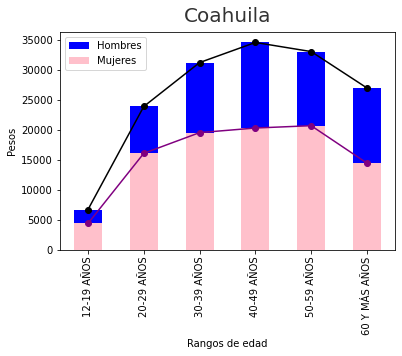

In [11]:
ax = Co.plot(x="Entidad", y="Hombres", kind="bar", color="blue")
Co.plot(x="Entidad", y="Mujeres", kind="bar", ax=ax, color="pink")
plt.title('Coahuila', pad=10, color='#333333',fontsize=20)
plt.xlabel('Rangos de edad')
plt.ylabel('Pesos')
trend_line_m = plt.plot(list(Co['Mujeres']),marker='o', color='purple', label='Trend Line')
trend_line_h = plt.plot(list(Co['Hombres']),marker='o', color='k', label='Trend Line')
plt.show()

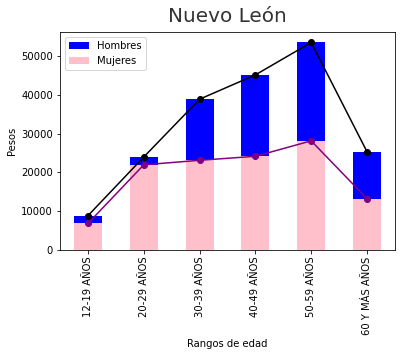

In [12]:
ax = Nl.plot(x="Entidad", y="Hombres", kind="bar", color="blue")
Nl.plot(x="Entidad", y="Mujeres", kind="bar", ax=ax, color="pink")
plt.title('Nuevo León', pad=10, color='#333333',fontsize=20)
plt.xlabel('Rangos de edad')
plt.ylabel('Pesos')
trend_line_m = plt.plot(list(Nl['Mujeres']),marker='o', color='purple', label='Trend Line')
trend_line_h = plt.plot(list(Nl['Hombres']),marker='o', color='k', label='Trend Line')
plt.show()

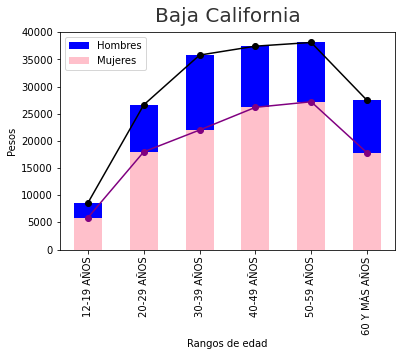

In [13]:
ax = Bc.plot(x="Entidad", y="Hombres", kind="bar", color="blue")
Bc.plot(x="Entidad", y="Mujeres", kind="bar", ax=ax, color="pink")
plt.title('Baja California', pad=10, color='#333333',fontsize=20)
plt.xlabel('Rangos de edad')
plt.ylabel('Pesos')
trend_line_m = plt.plot(list(Bc['Mujeres']),marker='o', color='purple', label='Trend Line')
trend_line_h = plt.plot(list(Bc['Hombres']),marker='o', color='k', label='Trend Line')
plt.show()

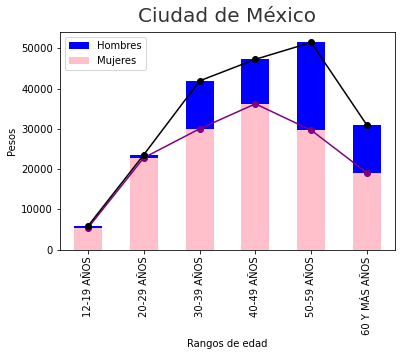

In [14]:
ax = Cm.plot(x="Entidad", y="Hombres", kind="bar", color="blue")
Cm.plot(x="Entidad", y="Mujeres", kind="bar", ax=ax, color="pink")
plt.title('Ciudad de México', pad=10, color='#333333',fontsize=20)
plt.xlabel('Rangos de edad')
plt.ylabel('Pesos')
trend_line_m = plt.plot(list(Cm['Mujeres']),marker='o', color='purple', label='Trend Line')
trend_line_h = plt.plot(list(Cm['Hombres']),marker='o', color='k', label='Trend Line')
plt.show()

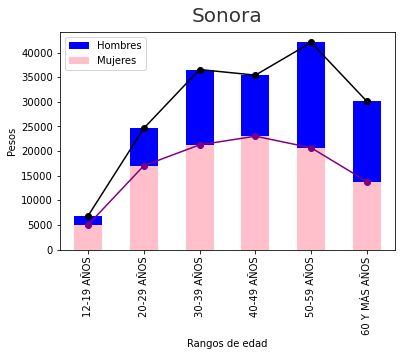

In [15]:
ax = Sn.plot(x="Entidad", y="Hombres", kind="bar", color="blue")
Sn.plot(x="Entidad", y="Mujeres", kind="bar", ax=ax, color="pink")
plt.title('Sonora', pad=10, color='#333333',fontsize=20)
plt.xlabel('Rangos de edad')
plt.ylabel('Pesos')
trend_line_m = plt.plot(list(Sn['Mujeres']),marker='o', color='purple', label='Trend Line')
trend_line_h = plt.plot(list(Sn['Hombres']),marker='o', color='k', label='Trend Line')
plt.show()

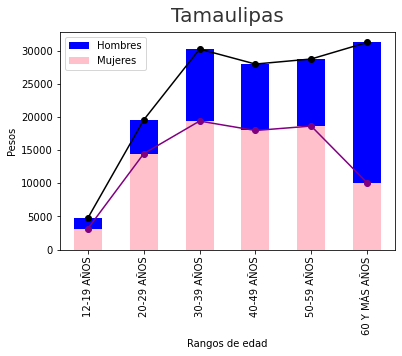

In [16]:
ax = Tm.plot(x="Entidad", y="Hombres", kind="bar", color="blue")
Tm.plot(x="Entidad", y="Mujeres", kind="bar", ax=ax, color="pink")
plt.title('Tamaulipas', pad=10, color='#333333',fontsize=20)
plt.xlabel('Rangos de edad')
plt.ylabel('Pesos')
trend_line_m = plt.plot(list(Tm['Mujeres']),marker='o', color='purple', label='Trend Line')
trend_line_h = plt.plot(list(Tm['Hombres']),marker='o', color='k', label='Trend Line')
plt.show()

# GRÁFICA DE TIENDAS POR MUNICIPIO DEL ESTADO DE NUEVO LEÓN.

### 1. Se lee el mapa del estado y la base de datos de las tienda de ropa correspondiente.

In [17]:
base2 = pd.read_csv('https://raw.githubusercontent.com/Axelflg/datasets/main/comprada.csv',encoding='ISO-8859-1')
estado = "NUEVOLEON2.shp"
map_df = gp.read_file(estado)

### 2. Se modifican los nombres de los municipios de tal forma que se quitan las letras mayúsculas con excepción de la primera; así como se eliminan todos los acentos presentes. Esto se hace para que los nombres coincidan sin problema del mapa como lo de la base de datos de la tienda y pueda realizarce la unión de dos bases de datos tomando como llave primaria el nombre del municipio.

In [18]:
# Aquí está el filtro para los nombres de los municipios dentro del mapa.
map_df['NOM_MUN'] = map_df['NOM_MUN'].apply(lambda x: x.capitalize())
map_df['NOM_MUN'] = map_df['NOM_MUN'].str.replace(u'í','i')
map_df['NOM_MUN'] = map_df['NOM_MUN'].str.replace(u'ó','o')
map_df['NOM_MUN'] = map_df['NOM_MUN'].str.replace(u'ú','u')
map_df['NOM_MUN'] = map_df['NOM_MUN'].str.replace(u'é','e')
map_df['NOM_MUN'] = map_df['NOM_MUN'].str.replace(u'á','a')
# Aquí está el filtro para los nombres de los municipios de la base datos de las tiendas de ropa.
base2['Municipio / Delegación'] = base2['Municipio / Delegación'].apply(lambda x: x.capitalize())
base2['Municipio / Delegación'] = base2['Municipio / Delegación'].str.replace('á','a')
base2['Municipio / Delegación'] = base2['Municipio / Delegación'].str.replace('é','e')
base2['Municipio / Delegación'] = base2['Municipio / Delegación'].str.replace('í','i')
base2['Municipio / Delegación'] = base2['Municipio / Delegación'].str.replace('ó','o')
base2['Municipio / Delegación'] = base2['Municipio / Delegación'].str.replace('ú','u')

### 3. Realizamos el conteo de numero de tiendas y las agrupamos por municipio.

In [19]:
conteo = base2.groupby(['Municipio / Delegación']).count()

### 4. Unimos los datos del mapa con los del conteo de la base de datos.

In [20]:
new_map = map_df.merge(conteo, how='left', left_on='NOM_MUN', right_on='Municipio / Delegación').sort_values(by = 'Nombre de Empresa / Razón Social',ascending = False)
# Hay valores que aparecerán Nan porque la base de datos de tiendas no abarca todos los municipios del estado, por eso eso valores al realizar el merge como no existen
# en la base de datos de las tienda de ropa, pero si en el mapa, se les asigna valores nulos; para ello rellenamos esos valores nulos con ceros.
new_map['Nombre de Empresa / Razón Social'] = new_map['Nombre de Empresa / Razón Social'].fillna(0)

Nota: Queremos realizar un mapa que nos coloree los estados de acuerdo al número de tiendas; sin embargo los municipios de Monterrey, San Pedro Garza García, San Nicolás de los Garza y Guadalupe resultan ser outliers en nuestra base de datos ya que son puntos mayores a 80 tiendas, por ejemplo: Monterrey tiene un total de 621 tiendas. Esto provoca que la paleta de colores no alcance a distinguir los valores más pequeños de concentración de tiendas, por lo que se tuvo que asignas a esos 4 municipios el valor máximo de 80 para que los valores de las demás tiendas pudieran resaltarse. Es una forma de si bien no eliminar los datos, podemos normalizar nuestros valores y considerar el tope superior "mas de 80".

In [21]:
new_map.loc[18,'Nombre de Empresa / Razón Social'] = 80
new_map.loc[20,'Nombre de Empresa / Razón Social'] = 80
new_map.loc[36,'Nombre de Empresa / Razón Social'] = 80
new_map.loc[55,'Nombre de Empresa / Razón Social'] = 80

In [22]:
# Esta parte sirve para asignar los nombres a cada municipio del estado.
new_map['coords'] = new_map['geometry'].apply(lambda x: x.representative_point().coords[:])
new_map['coords'] = [coords[0] for coords in new_map['coords']]

### 5. Finalmente graficamos el mapa.

<ipython-input-23-41661b1dc90e>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = new_map['NOM_MUN'][i], xy = new_map['coords'][i],horizontalalignment='center',weight='bold',fontsize = 7).set_color('red')


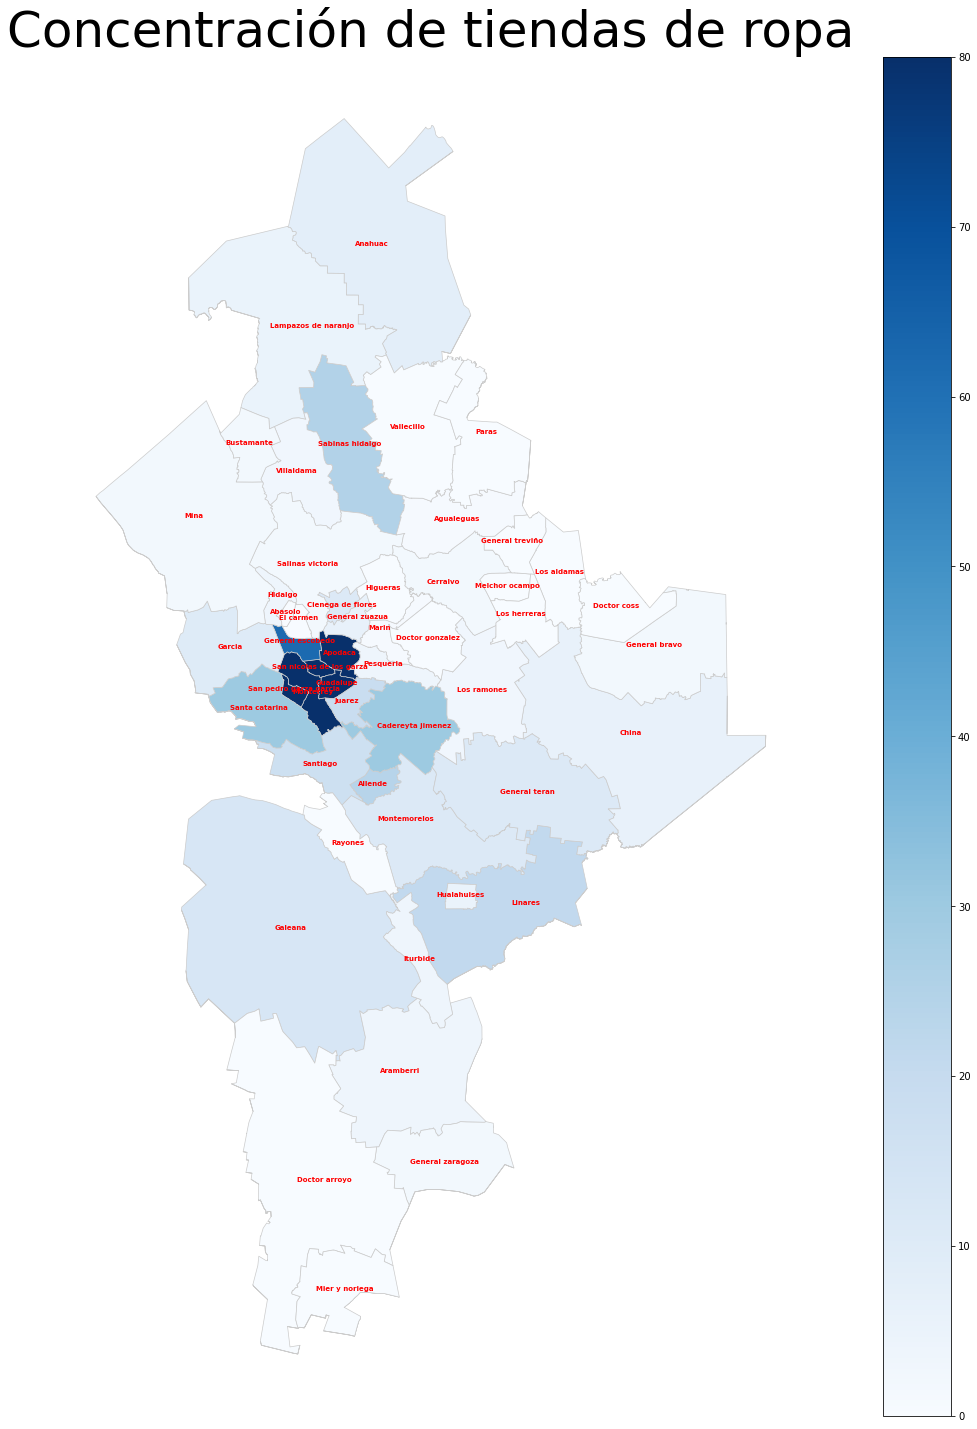

In [23]:
# Selecionamos la columna de interés, en este caso fue Trade Value dentro de la base de datos.
variable = 'Nombre de Empresa / Razón Social'
# Calculamos los valores máximo y mínimo dentro de la columna selecionada para la escala de colres.
vmin, vmax = new_map[variable].min(), new_map[variable].max()
# Creamos el espacio de trabajo para imprimir la figura en la pantalla.
fig, ax = plt.subplots(1, figsize=(30, 25))
# Quitamos los axis
ax.axis('off')
# Agregamos un título dentro de la figura con una orientación espacial y un tipo de fuente.
ax.set_title('Concentración de tiendas de ropa', fontdict={'fontsize': '50', 'fontweight' : '3'})
# Creamos una barra de colores o selecionamos una de las ya existentes en matplotlib y la normalizamos al valor máximo y mínimo.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# Aplicamos el siguiente comando para evitar problemas con la paleta de colores.
sm.set_array([]) 
# Agregamos la barra de color a la figura.
fig.colorbar(sm)
# Imprimimos el mapa con su tabla de colores.
new_map.plot(column=variable, cmap='Blues', linewidth=0.7, ax=ax, edgecolor='.8')
for i in range(6,57,1):
    plt.plot(*new_map['geometry'][i].exterior.xy,color='#FF4500', alpha= 0.0)
    plt.annotate(s = new_map['NOM_MUN'][i], xy = new_map['coords'][i],horizontalalignment='center',weight='bold',fontsize = 7).set_color('red')

In [24]:
internet = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/net_users.csv',encoding='latin-1',skiprows=4)
internet.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.0,0.0,0.0,0.0,0.0,0.000000,...,69.0,74.00000,78.9,83.78,88.6612,93.5425,97.1700,97.1700,97.1700,NaN
1,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.0,0.0,0.0,0.0,0.0,0.000000,...,5.0,5.45455,5.9,7.00,8.2600,11.2000,13.5000,13.5000,13.5000,NaN
2,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.0,0.0,0.0,0.0,0.0,0.000000,...,3.1,6.50000,8.9,21.40,12.4000,13.0000,14.3391,14.3391,14.3391,NaN
3,Albania,ALB,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.0,0.0,0.0,0.0,0.0,0.011169,...,49.0,54.65600,57.2,60.10,63.2529,66.3634,71.8470,71.8470,69.6429,NaN
4,Andorra,AND,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.0,0.0,0.0,0.0,0.0,0.000000,...,81.0,86.43440,94.0,95.90,96.9100,97.9306,91.5675,91.5675,91.5675,NaN


In [25]:
# De toda la base de datos seleccionamos solamente los de México porque si bien el archivo original contemplaba otros paises.
internet_mexico = internet[internet['Country Name'] == 'Mexico'].dropna(axis=1)
internet_mexico

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
152,Mexico,MEX,Individuals using the Internet (% of population),IT.NET.USER.ZS,0.0,0.005881,0.017308,0.028305,0.043339,0.102564,...,31.05,37.1763,39.75,43.46,44.39,57.431,59.5404,63.8522,65.7726,70.0699


In [26]:
# Seleccionamos solamente la zona del dataframe que se va a graficar.
internet_mexico = internet_mexico.iloc[:,range(4,len(internet_mexico.columns.values))]
internet_mexico = internet_mexico.T
internet_mexico['año'] = internet_mexico.index
internet_mexico.columns = ['Porcentaje', 'Año']

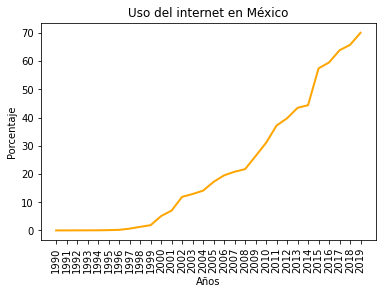

In [27]:
plt.plot(internet_mexico['Porcentaje'], color='orange', linewidth=2.0)
plt.xticks(rotation = 90)
plt.xlabel("Años")
plt.ylabel("Porcentaje")
plt.title("Uso del internet en México")
plt.show()

In [28]:
# leemos la base de datos de las opiniones del internet obtenidas de OECD iLibrary.
internet_2 = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/internet_2.csv',encoding='latin-1',skiprows=1)

Nota: La encuesta registrada en 2015 le realizó a pesonas jóvenes, principalmente estudiantes de máximo 17 años de edad sobre su opinión del uso de las herramientas o servicios digitales en distintos países. En nuestro caso solamente selecionamos los valores de méxico de 6 afirmaciones que se les plantearon a los participantes. Para más detalles: https://read.oecd-ilibrary.org/education/pisa-2015-results-volume-iii_9789264273856-en#page1

In [29]:
# De todo el archivo filtramos solamente los de México.
internet_2_mex = internet_2[internet_2['Unnamed: 0'] == 'Mexico']

In [30]:
# Dividimos las encuentas por géneros.
internet_2_mex_h = internet_2_mex.iloc[:,range(1,13)]
internet_2_mex_m = internet_2_mex.iloc[:,range(13,25)]

In [31]:
# Eliminamos columnas que no nos sirven de los Dataframes.
cols = [1,3,5,7, 9,11]
internet_2_mex_h.drop(internet_2_mex_h.columns[cols],axis=1,inplace=True)
internet_2_mex_m.drop(internet_2_mex_m.columns[cols],axis=1,inplace=True)

C:\ProgramData\Miniconda3\envs\Envi1\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
# Debido a que las respuestas estaban en inglés, tuvimos que pasarlas a español para visualizarlas y no hacer una mezcla de idiomas en las gráficas.
answer = ['Me olvido del tiempo cuando uso los servicios digitales','El internet es una excelente herramienta para obtener información sobre algún tema.',
'Es muy útil tener redes sociales en internet.','Me emociona descubrir nuevos servicios digitales o aplicaciones.',
'Me siento mal si no hay alguna conexión de internet.','Me gusta utilizar los servicios digitales']

In [33]:
# Se acomodan los datos porcentuales de hombres y mujeres para que estén listos para graficarse.
respuestas = pd.DataFrame({'hombres':list(internet_2_mex_h.iloc[0]),'mujeres':list(internet_2_mex_m.iloc[0]),'answer':answer})
respuestas['hombres'] = respuestas['hombres'].apply(pd.to_numeric)
respuestas['mujeres'] = respuestas['mujeres'].apply(pd.to_numeric)

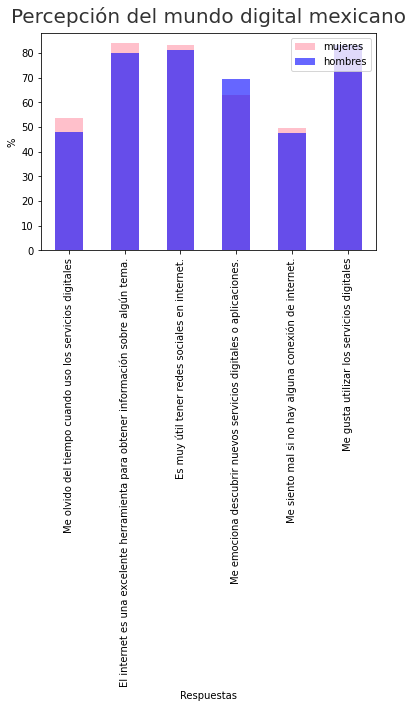

In [34]:
# Se grafican las respuestas de hombres y mujeres.
ax = respuestas.plot(x="answer", y="mujeres", kind="bar", color="pink")
respuestas.plot(x="answer", y="hombres", kind="bar", ax=ax, color="blue",alpha=0.6)
plt.title('Percepción del mundo digital mexicano', pad=10, color='#333333',fontsize=20)
plt.xlabel('Respuestas')
plt.ylabel('%')
plt.show()

### Esta sección se importan los datos extraidos del API de popular times. Este API nos brindó información sobre las principales tiendas de todo el estado. Si bien en el estado se tenían 4000 tiendas aproximadamente como primer estancia, se reealizó un filtrado de dicha información contemplando 4 parámetros:
    -Porcentaje de Obesidad por municipio.
    -Número por municipio.
    -Concentración de tiendas por colonia.
    -Concentración de tiendas por municipio.


### 1. Está librería realiza lo conocido como "scraping" a la base de datos de google maps; los establecimientos registrados en la base de datos de google maps tienen parámetros, que sirven para realizar un estudio como es el caso de las calificaciones a dichos establecimiento o los horarios de concurrencia de dichos establecimientos.

In [35]:
data3 = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/nuevo_leon_poi_time_2.csv')

In [36]:
buena_puntuacion = data3[(data3['rating'] >= 4) & (data3['rating_n'] >= 30)]
len(buena_puntuacion)


163

In [37]:
buena_puntuacion['municipio'].unique()

array(['San Pedro Garza Garcia', 'Monterrey', 'San Nicolas De Los Garza',
       'General Escobedo', 'Cadereyta Jimenez'], dtype=object)

In [38]:
tiendas_monterrey = buena_puntuacion[buena_puntuacion['municipio'] == 'Monterrey']

In [39]:
tiendas_monterrey['nombre_tienda'].unique()

array(['Moda casual', 'Y  ropa y calzado de dama',
       'Y ropa y accesorios caballero', 'Tienda monterrey iii',
       'Ropa y calzado dama', 'Ab boutique suc. plaza mexico',
       'Almacen de ropa ezequiel valdez lopez', 'American cotton',
       'Armadillo con boina', 'Armando novedades',
       'Auxiliar de articulos de seguridad', 'Bazar de ropa usada',
       'Bebe mart', 'Bellas ropa de dama', 'Bershka cumbres',
       'Bershka galerias monterrey', 'Blusas y blusitas', 'Bodega',
       'Bolsas y articulos de piel', 'Bolsos fashion', 'Boutique marisol',
       'Boutique sin nombre', 'Butique',
       'Camiseria levaron tienda de ropa', 'Camiseria mexico',
       'Centro chemisette', 'Chicchic co', 'Cinturones marquez',
       'Comercializadora el asturiano',
       'Comercio al por menor de ropa de bebe',
       'Comercio al por menor de ropa, excepto de bebe y lenceria',
       'Comercio al por menor de ropa, excepto de bebe y lenceria sin nombre',
       'Compostura de ropa 

In [40]:
buena_puntuacion[buena_puntuacion['municipio'] == 'Cadereyta Jimenez']

,Unnamed: 0,nombre_tienda,razon_social,clase,estrato,tipo_vialidad,calle,num_exterior,num_interior,colonia,...,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_n,populartimes,time_spent,place_id,current_popularity,popular_times
150,150,Casa galvan,NaN,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,CALLE,MIGUEL HIDALGO,211.0,0.0,CADEREYTA JIMENEZ CENTRO,...,176.262942,95,9,4.5,150.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[15, 45]",ChIJZYBcIeXbYoYRkVxGYtUzSJQ,NaN,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '..."


In [41]:
buena_puntuacion[buena_puntuacion['municipio'] == 'San Nicolas De Los Garza']

,Unnamed: 0,nombre_tienda,razon_social,clase,estrato,tipo_vialidad,calle,num_exterior,num_interior,colonia,...,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_n,populartimes,time_spent,place_id,current_popularity,popular_times
27,27,American eagle paseo la fe,AMERICAN EAGLE MEXICO RETAIL S DE RL DE CV,"Comercio al por mayor de ropa, bisutería y acc...",11 a 30 personas,AVENIDA,MIGUEL ALEMAN,200.0,NaN,TALAVERNA,...,4569.30629,313,3,4.7,359.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",NaN,ChIJAyV4aavrYoYRY5Pu9vewpsM,NaN,"[[7, None, 1], [1, [[6, 0, '', '', '6 AM'], [7..."
129,129,Calvin klein outlet monterrey,BASECO SAPI DE CV,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,AVENIDA,CARRETERA MIGUEL ALEMÁN,200.0,0.0,LA TALAVERNA,...,4569.30629,313,4,4.5,65.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",NaN,ChIJIZ9stcDrYoYRuzq1h_jNbik,NaN,"[[7, None, 0], [1, [[6, 0, '', '', '6 AM'], [7..."


In [42]:
buena_puntuacion[buena_puntuacion['municipio'] == 'General Escobedo']

,Unnamed: 0,nombre_tienda,razon_social,clase,estrato,tipo_vialidad,calle,num_exterior,num_interior,colonia,...,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_n,populartimes,time_spent,place_id,current_popularity,popular_times
128,128,Calvin klein outlet monterrey,BASECO SAPI DE CV,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,PROLONGACION,MANUEL L. BARRAGÁN,220.0,51.0,EXHACIENDA EL CANADA,...,1293.528121,208,3,4.4,46.0,NaN,NaN,ChIJE55dzNaTYoYRdWl_l-BFwS0,NaN,NaN
683,683,Tommy hilfiger outlet monterrey,BASECO SAPI DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,PROLONGACION,MANUEL L. BARRAGÁN,220.0,NaN,EX HACIENDA EL CANADA,...,1293.528121,208,7,4.1,55.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[10, 10]",ChIJc89nP7uVYoYRJOTa0zUy-CM,NaN,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '..."


In [43]:
buena_puntuacion[buena_puntuacion['municipio'] == 'San Pedro Garza Garcia']

,Unnamed: 0,nombre_tienda,razon_social,clase,estrato,tipo_vialidad,calle,num_exterior,num_interior,colonia,...,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,rating,rating_n,populartimes,time_spent,place_id,current_popularity,popular_times
0,0,"Monterrey, san agustin",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,Batallón San Patricio,1000.0,0.0,REAL DE SAN AGUSTIN,...,4634.679777,247,4,4.5,241.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[10, 10]",ChIJ6fE4SW2-YoYRarYYMb2uDIU,NaN,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '..."
255,255,Forever fashion drive mty,FOREVER 21 MEXICO S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",51 a 100 personas,AVENIDA,DIEGO RIVERA,1000.0,0.0,RESIDENCUIAL DE SAN AGUSTIN,...,4634.679777,247,1,4.3,841.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[10, 10]",ChIJS1c7OhO-YoYRNV9lwk4q3bc,NaN,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '..."
354,354,Massimo dutti,MASSIMO DUTTI MEXICO SA DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,JOSE VASCONCELOS,402.0,NaN,DEL VALLE SAN PEDRO GARZA GARCIA,...,4634.679777,247,1,4.2,61.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[10, 10]",ChIJESzTt-e9YoYR1bdqSeSDpg4,NaN,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '..."
478,478,Pull and bear,PULL & BEAR MEXICO SA DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,REAL DE SAN AGUSTIN,222.0,NaN,REAL DE SAN AGUSTIN,...,4634.679777,247,4,4.5,577.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[15, 15]",ChIJ8TmBMqaiYoYRQOR5PljBwbY,NaN,"[[7, None, 1], [1, [[6, 0, '', '', '6 AM'], [7..."


### Análisis de los datos de contacto filtrados por nuestro estudio.

Realizando un análisis de los datos de las tiendas que obtuvimos nos percatamos de que la mayor concentración de tiendas filtradas por nuestro estudio cae en 5 de los 51 municipios: Monterrey, Cadereyta Jiménez, San Nicolás De Los Garza, General Escobedo, San Pedro Garza García. Estos 5 municipios son la clave para la difusión de nuestro producto, porque serán los lugares en donde daremos a conocer nuestra marca dentro del estado. Dar a conocer nuestra marca implica desde encontrar otras tiendas de ropa que quieran vender nuestra línea, colocar publicidad o el lugar idóneo para colocar una tienda física propia de la marca.
Por una parte se observó que la mayor parte de contactos de establecimientos que cumplieron con nuestras variables  caen en el estado de Monterrey; algunos como es el caso de Cadereyta de Jiménez arrojó solamente un contacto, no obstante eso no implica que en dicho lugar no se vaya a buscar clientes que quieran distribuir nuestro producto, porque a pesar de no contar con tantos datos de contacto como el caso de Monterrey se optará por visitar  físicamente las zonas céntricas de los cinco municipios para patrocinar nuestra tienda y no solo abarcar la capital del estado.

# En esta sección se busca encontrar los puntos con mejor calificación, así como los horarios en los que se encuentra mayor número de usuarios en dichos puntos.

### 1. Filtramos la base de datos de acuerdo a las condiciones.

Análisis: De las tiendas de ropas dentro de la base de datos se aplicó un filtro para encontrar los lugares en donde dichas tiendas tuvieron las mejores calificaciones y números de comentarios de acuerdo google. En este caso se tomó en cuenta un mínimo de calificación de 4.5 y mínimo 70 comentarios del recinto. El API de Google nos arroja en qué horarios es mayor o menor el número de usuarios, es decir, ¿a qué hora hay más gente?, de esta forma si nosotros logramos conocer esos puntos estratégicos y los horarios en los que hay mayor número de personas podremos saber cuáles puntos y horarios son clave para repartir o colocar propaganda de nuestra tienda y de esta forma los usuarios puedan conocer nuestro producto. Cabe recalcar que aunque los valores que nos arroja son de la tienda, estos se toman como un punto geográfico y no como una tienda. En pocas palabras, estamos visualizando ¿qué tanto hay de gente en un punto geofráico?. Dicho procedimiento se utiliza estrategicamente como puntos de interes principalmente publicitarios dentros de los 5 municipios del estado de Nuevo León. 

In [44]:
buena_ubicacion = data3[(data3['rating'] >= 4.5) & (data3['rating_n'] >= 70)].reset_index(drop=True)

In [45]:
# Eliminamos los puntos que no cuentas con información sobre los tiempos de usuario.
buena_ubicacion = buena_ubicacion.drop([6,7,9,12]).reset_index(drop=True)
buena_ubicacion['municipio']

0       San Pedro Garza Garcia
1                    Monterrey
2     San Nicolas De Los Garza
3                    Monterrey
4            Cadereyta Jimenez
5                    Monterrey
6                    Monterrey
7                    Monterrey
8                    Monterrey
9                    Monterrey
10      San Pedro Garza Garcia
11                   Monterrey
12                   Monterrey
13                   Monterrey
14                   Monterrey
Name: municipio, dtype: object

### 2. Asignamos cada punto a una variable p(punto).

In [46]:
p1 = buena_ubicacion['populartimes'].iloc[0]
p2 = buena_ubicacion['populartimes'].iloc[1]
p3 = buena_ubicacion['populartimes'].iloc[2]
p4 = buena_ubicacion['populartimes'].iloc[3]
p5 = buena_ubicacion['populartimes'].iloc[4]
p6 = buena_ubicacion['populartimes'].iloc[5]
p7 = buena_ubicacion['populartimes'].iloc[6]
p8 = buena_ubicacion['populartimes'].iloc[7]
p9 = buena_ubicacion['populartimes'].iloc[8]
p10 = buena_ubicacion['populartimes'].iloc[9]
p11 = buena_ubicacion['populartimes'].iloc[10]
p12 = buena_ubicacion['populartimes'].iloc[11]
p13 = buena_ubicacion['populartimes'].iloc[12]
p14 = buena_ubicacion['populartimes'].iloc[13]
p15 = buena_ubicacion['populartimes'].iloc[14]

### 3. Como la salida son strings; convertimos dichos strings en una lista de dicionarios utilizando la librería datetime con la función "eval". Esto sucede porque lainformación viene en formato de una lista de dicionarios, pero todo convertido a formato string.

In [47]:
p1 = eval(p1)
p2 = eval(p2)
p3 = eval(p3)
p4 = eval(p4)
p5 = eval(p5)
p6 = eval(p6)
p7 = eval(p7)
p8 = eval(p8)
p9 = eval(p9)
p10 = eval(p10)
p11 = eval(p11)
p12 = eval(p12)
p13 = eval(p13)
p14 = eval(p14)
p15 = eval(p15)

De esos 15 puntos que se analizaron caen en el municipio de Monterrey principalmente, mientras que los otros caen en los municipios de Cadereyta de Jimenez, San Nicolás de los Garza, General Escobedo y San Pedro Graza García.

### 4. Ubicando los puntos utilizando la librería gmplot.

In [48]:
latitude_list = [25.64809373, 25.66644948, 25.71997068, 25.73308375, 25.59038402, 25.66271911, 25.68470447, 25.68464291, 25.67953221, 25.66852024, 25.64806335, 25.66852024, 25.66716115, 25.66716115, 25.66760141] 
longitude_list = [-100.33683469, -100.30759635, -100.22112618, -100.39782248, -99.99969556, -100.32201598, -100.31647297, -100.31872591, -100.31338704, -100.31508961, -100.33797825, -100.31508961, -100.31116401, -100.31116401, -100.32641874]
gmap3 = gmplot.GoogleMapPlotter(25.667161, -100.311164, 13) 
gmap3.scatter( latitude_list, longitude_list, 'yellow', 
                            size = 40, marker = False )  
gmap3.draw( "map13.html" ) 

### 5. Graficando los horarios de mayor número de usuarios por punto durante los 7 días de la semana.
Nota: Al final de las gráficas se encuentra la coordenada de dicho lugar.

## Punto #1

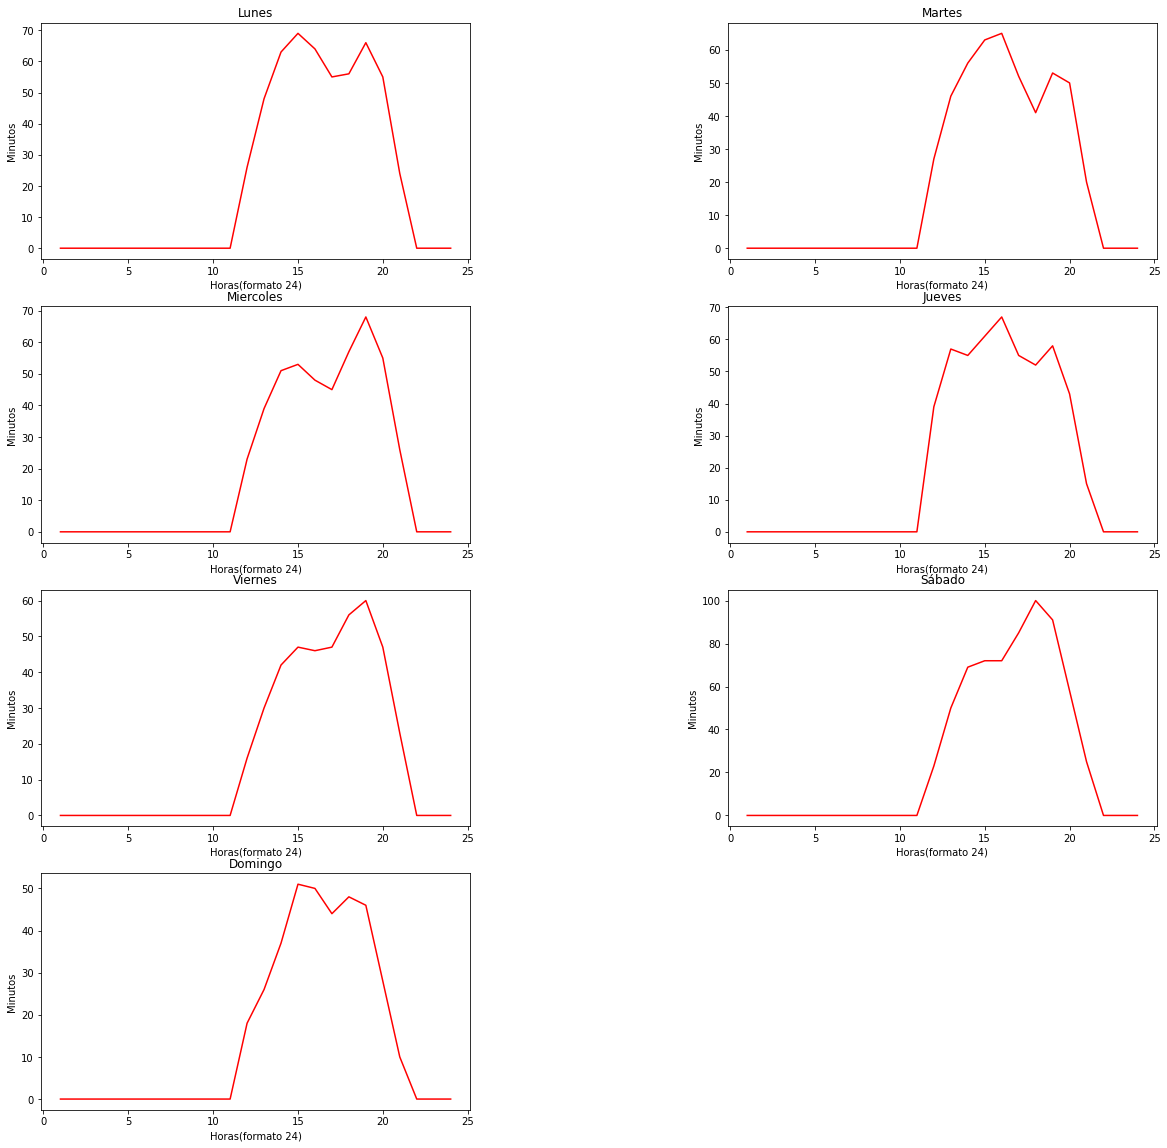

Las coordenadas de este punto son: 25.64809373 latitud  -100.33683469 longitud.


In [49]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p1[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p1[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p1[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p1[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p1[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p1[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p1[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()

print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][0],'latitud ',buena_ubicacion['longitud'][0],'longitud.')

# Punto #2

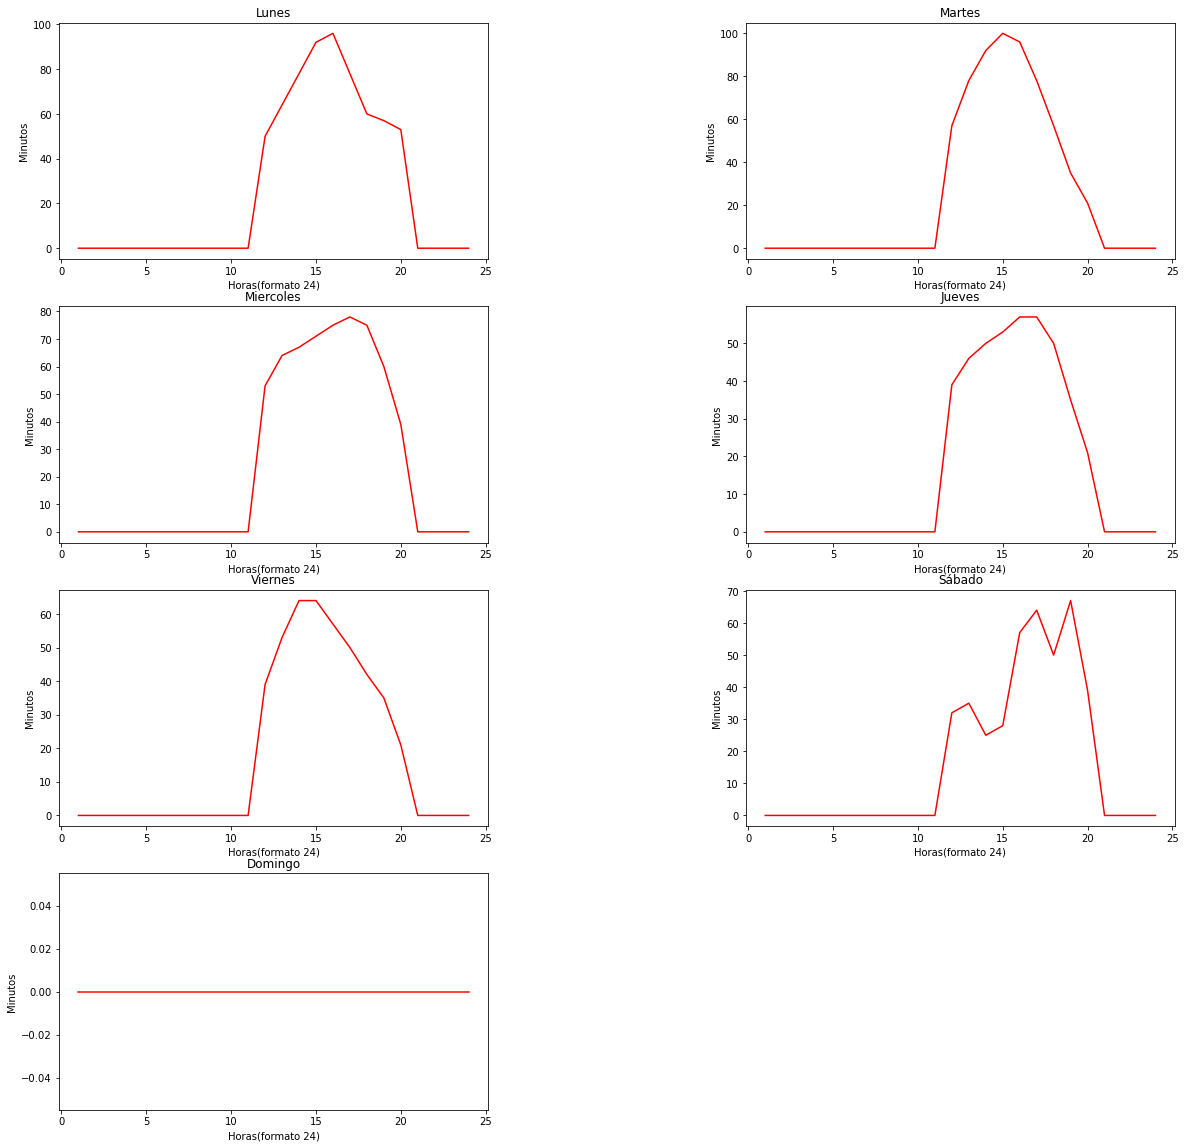

Las coordenadas de este punto son: 25.66644948 latitud  -100.30759635 longitud.


In [50]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p2[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p2[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p2[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p2[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p2[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p2[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p2[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][1],'latitud ',buena_ubicacion['longitud'][1],'longitud.')

## Punto #3

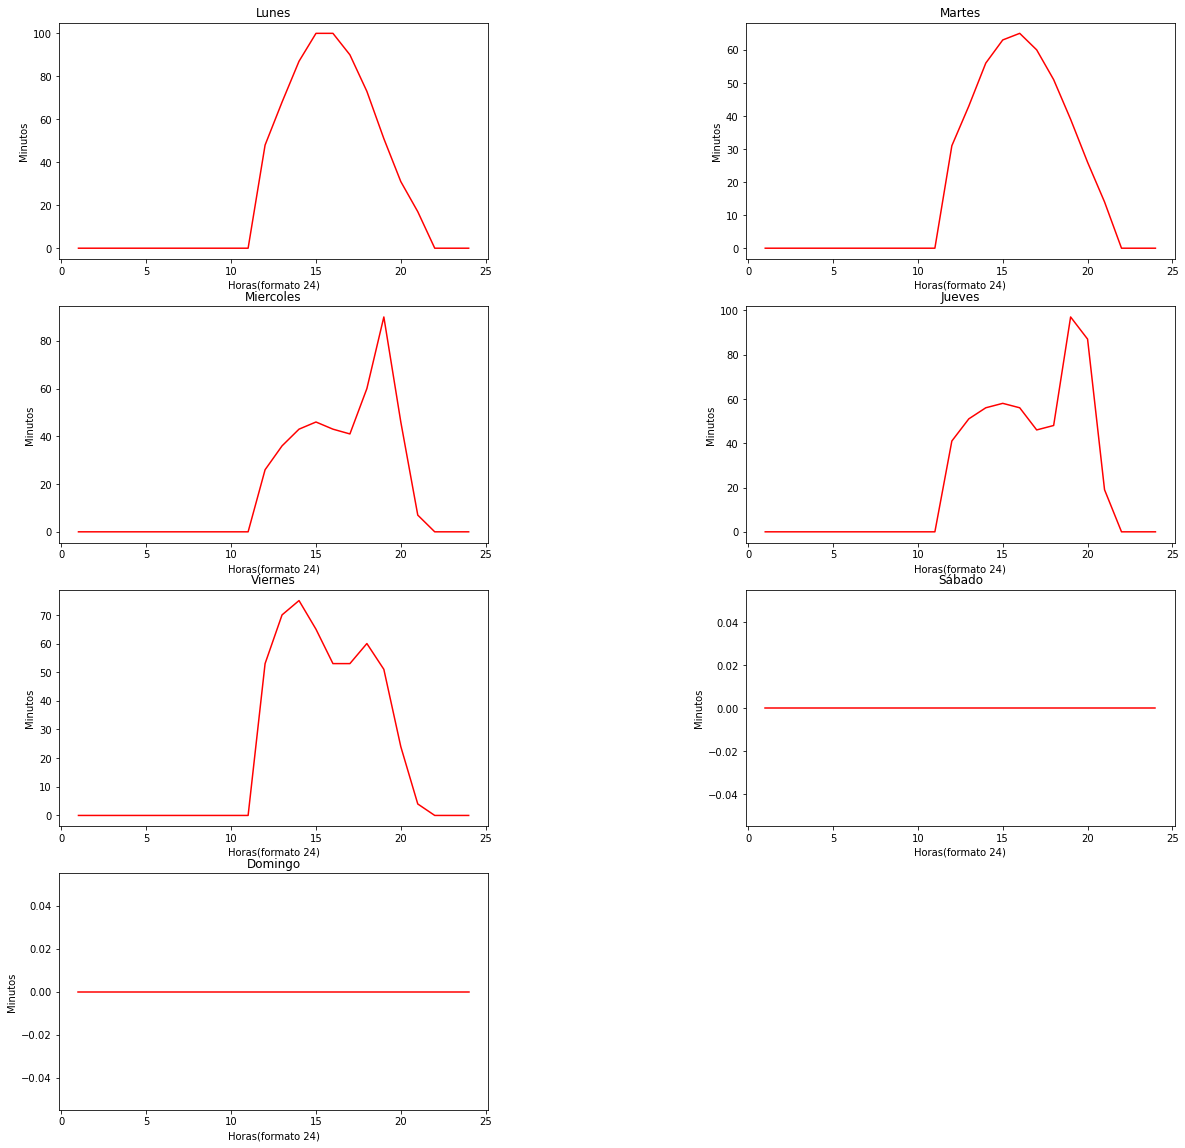

Las coordenadas de este punto son: 25.71997068 latitud  -100.22112618 longitud.


In [51]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p3[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p3[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p3[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p3[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p3[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p3[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p3[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][2],'latitud ',buena_ubicacion['longitud'][2],'longitud.')

## Punto #4

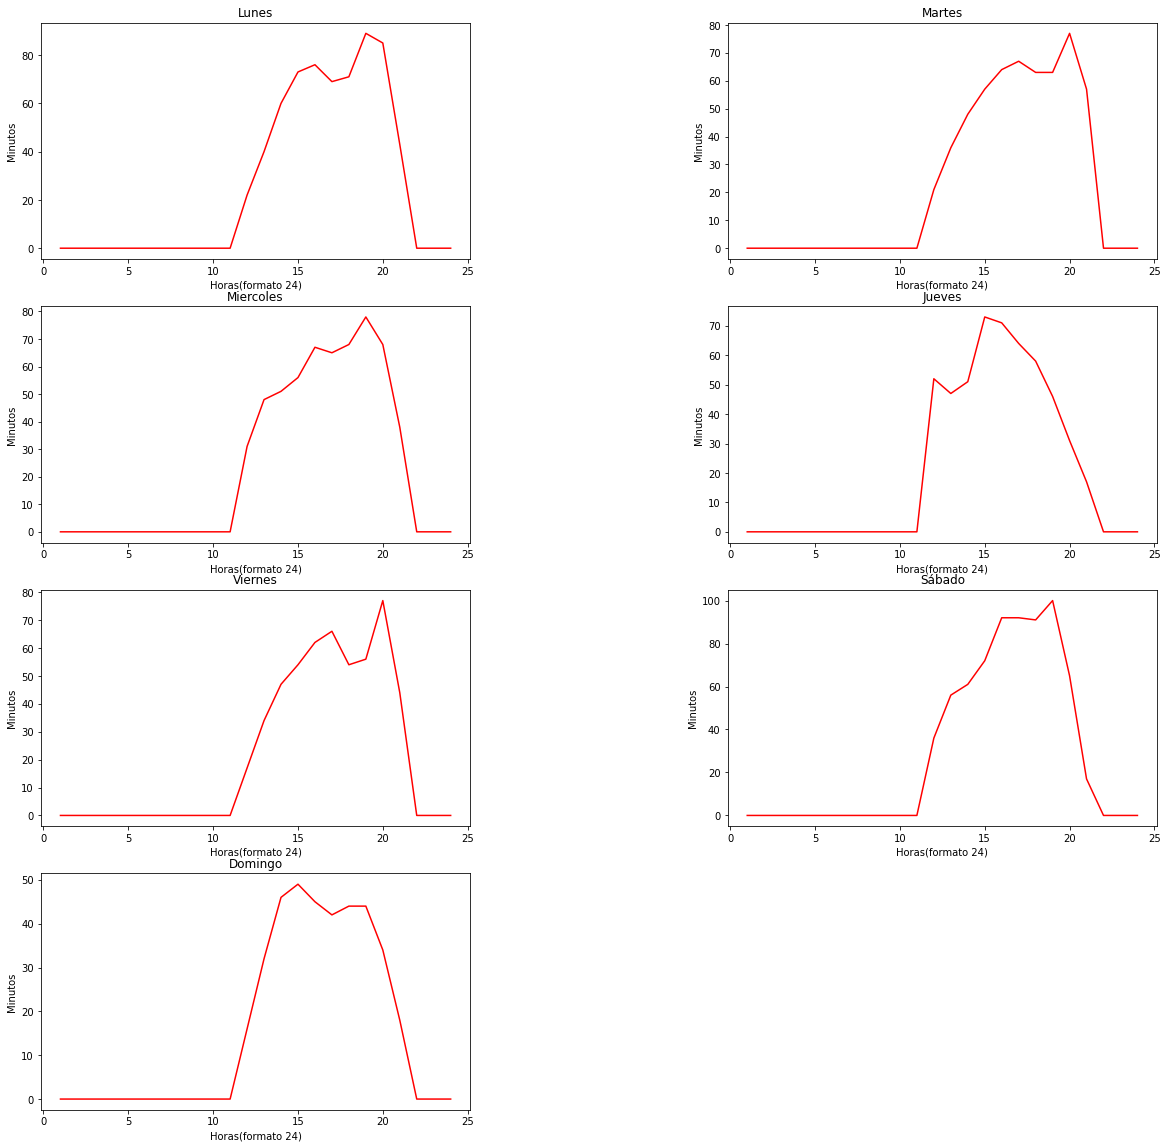

Las coordenadas de este punto son: 25.73308375 latitud  -100.39782248 longitud.


In [52]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p4[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p4[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p4[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p4[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p4[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p4[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p4[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][3],'latitud ',buena_ubicacion['longitud'][3],'longitud.')

## Punto #5

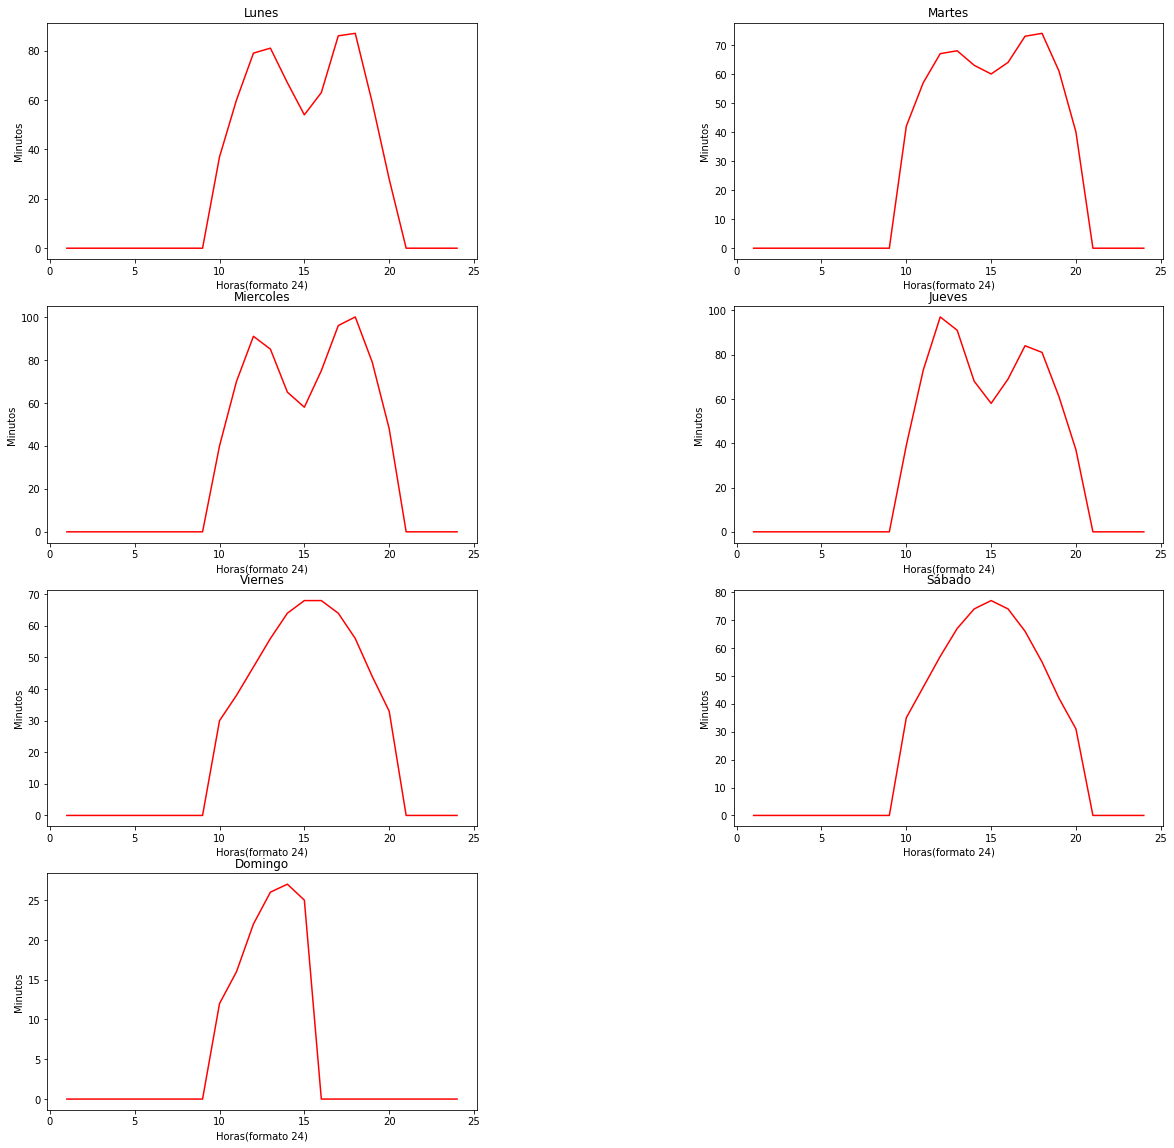

Las coordenadas de este punto son: 25.59038402 latitud  -99.99969556 longitud.


In [53]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p5[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p5[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p5[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p5[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p5[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p5[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p5[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][4],'latitud ',buena_ubicacion['longitud'][4],'longitud.')

### Punto #6

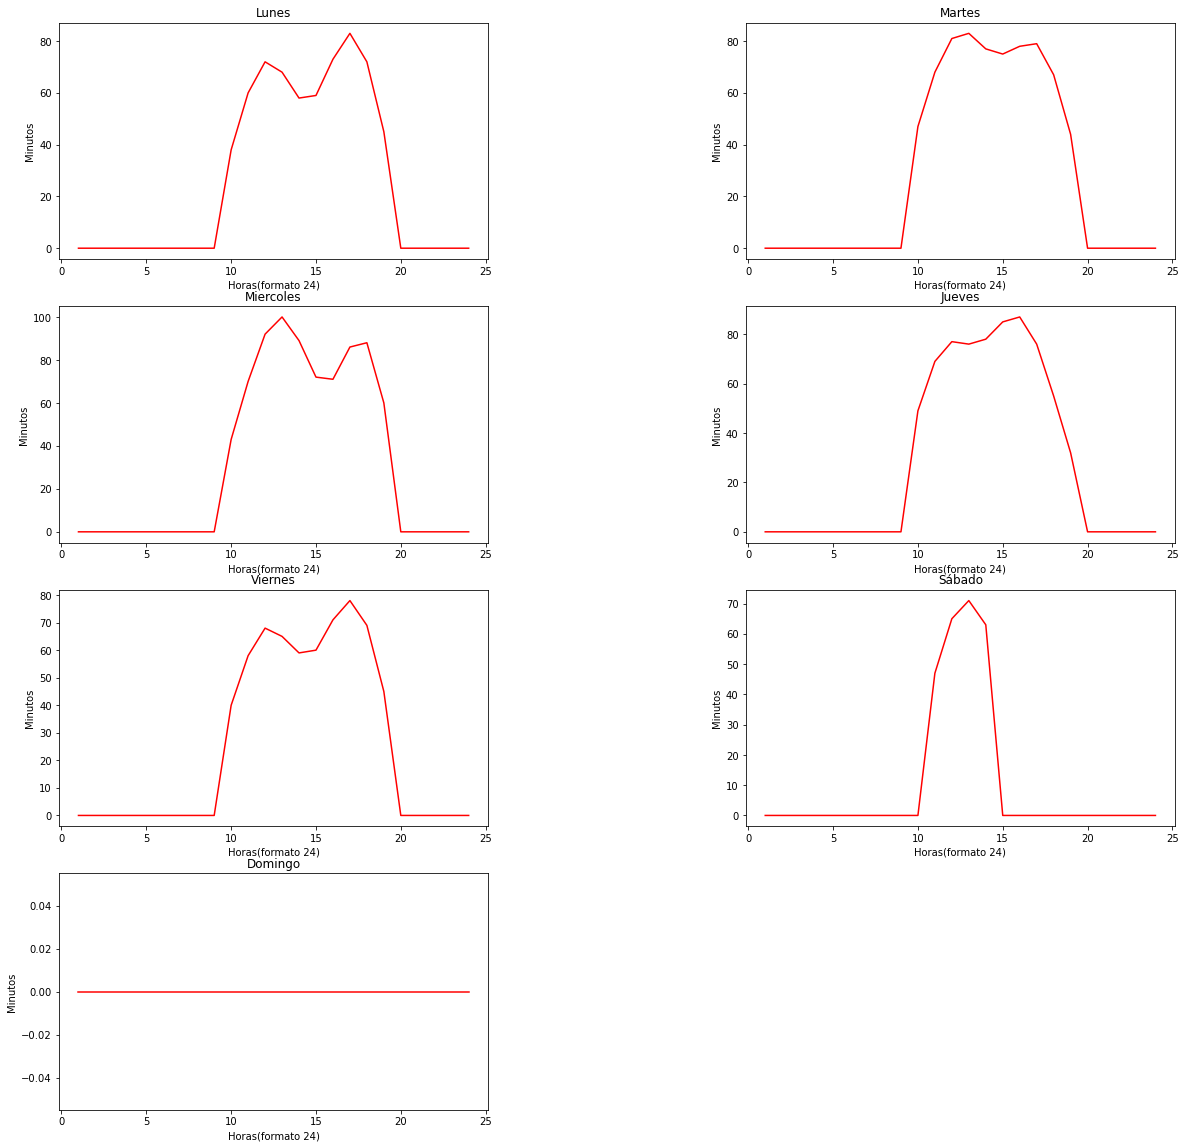

Las coordenadas de este punto son: 25.66271911 latitud  -100.32201598 longitud.


In [54]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p6[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p6[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p6[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p6[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p6[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p6[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p6[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][5],'latitud ',buena_ubicacion['longitud'][5],'longitud.')

### Punto #7

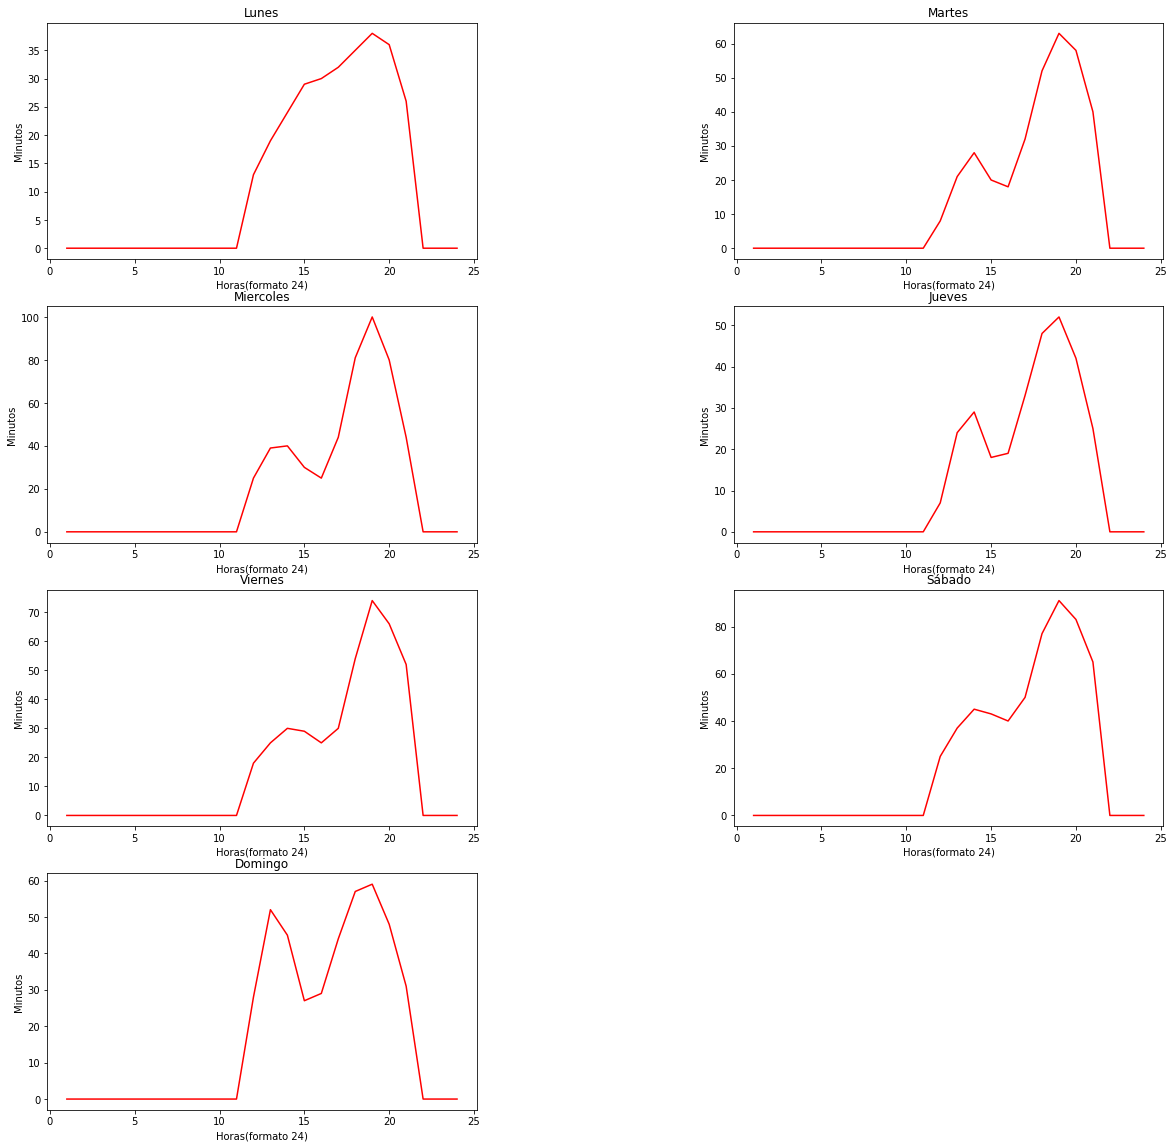

Las coordenadas de este punto son: 25.68470447 latitud  -100.31647297 longitud.


In [55]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p7[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p7[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p7[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p7[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p7[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p7[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p7[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][6],'latitud ',buena_ubicacion['longitud'][6],'longitud.')

### Punto #8

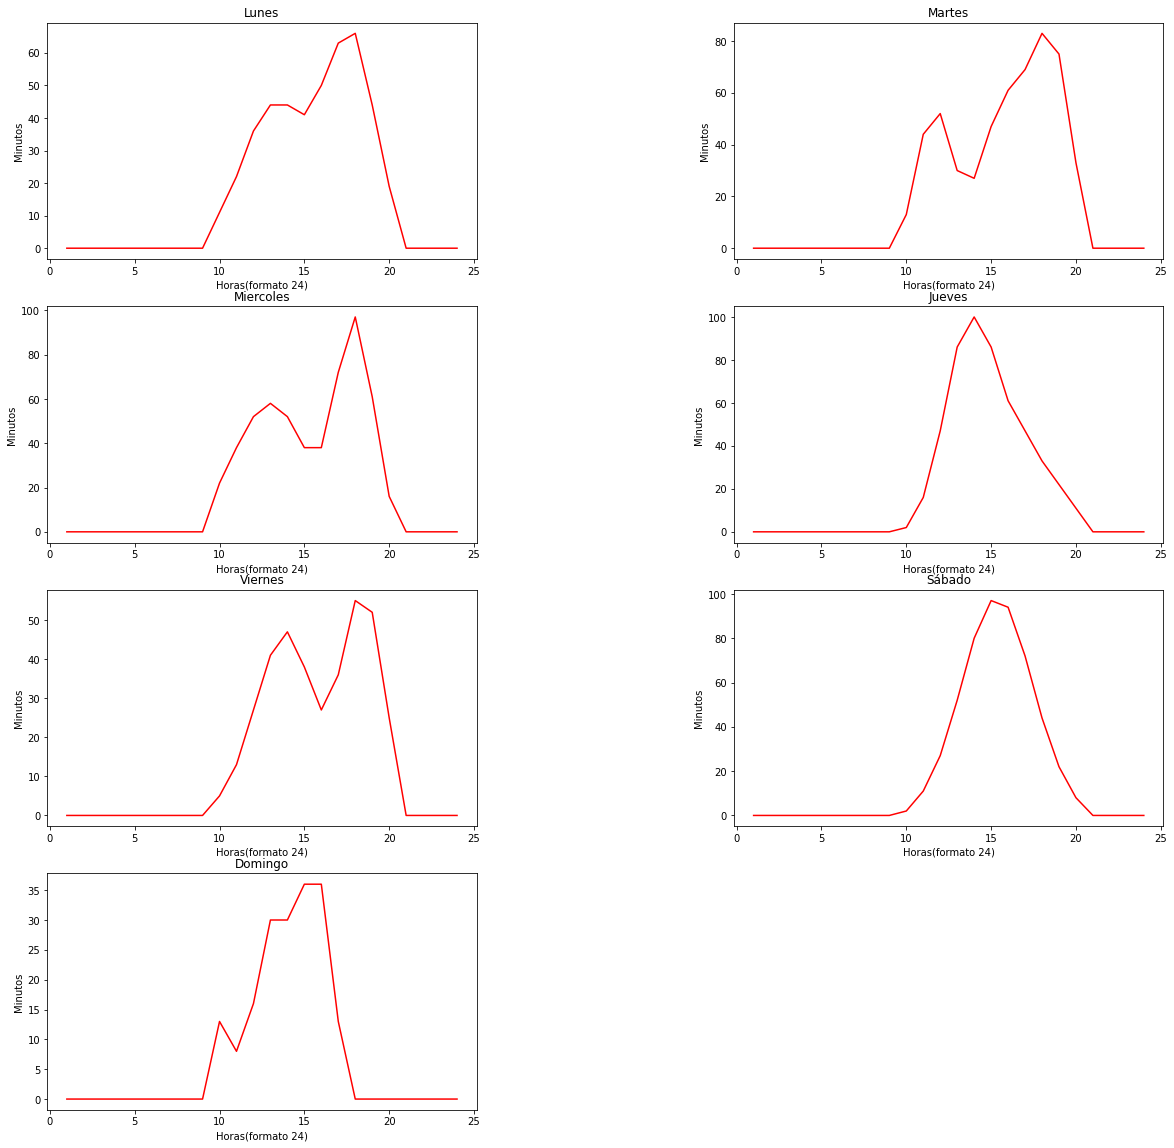

Las coordenadas de este punto son: 25.68464291 latitud  -100.31872591 longitud.


In [56]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p8[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p8[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p8[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p8[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p8[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p8[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p8[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][7],'latitud ',buena_ubicacion['longitud'][7],'longitud.')

### Punto #9

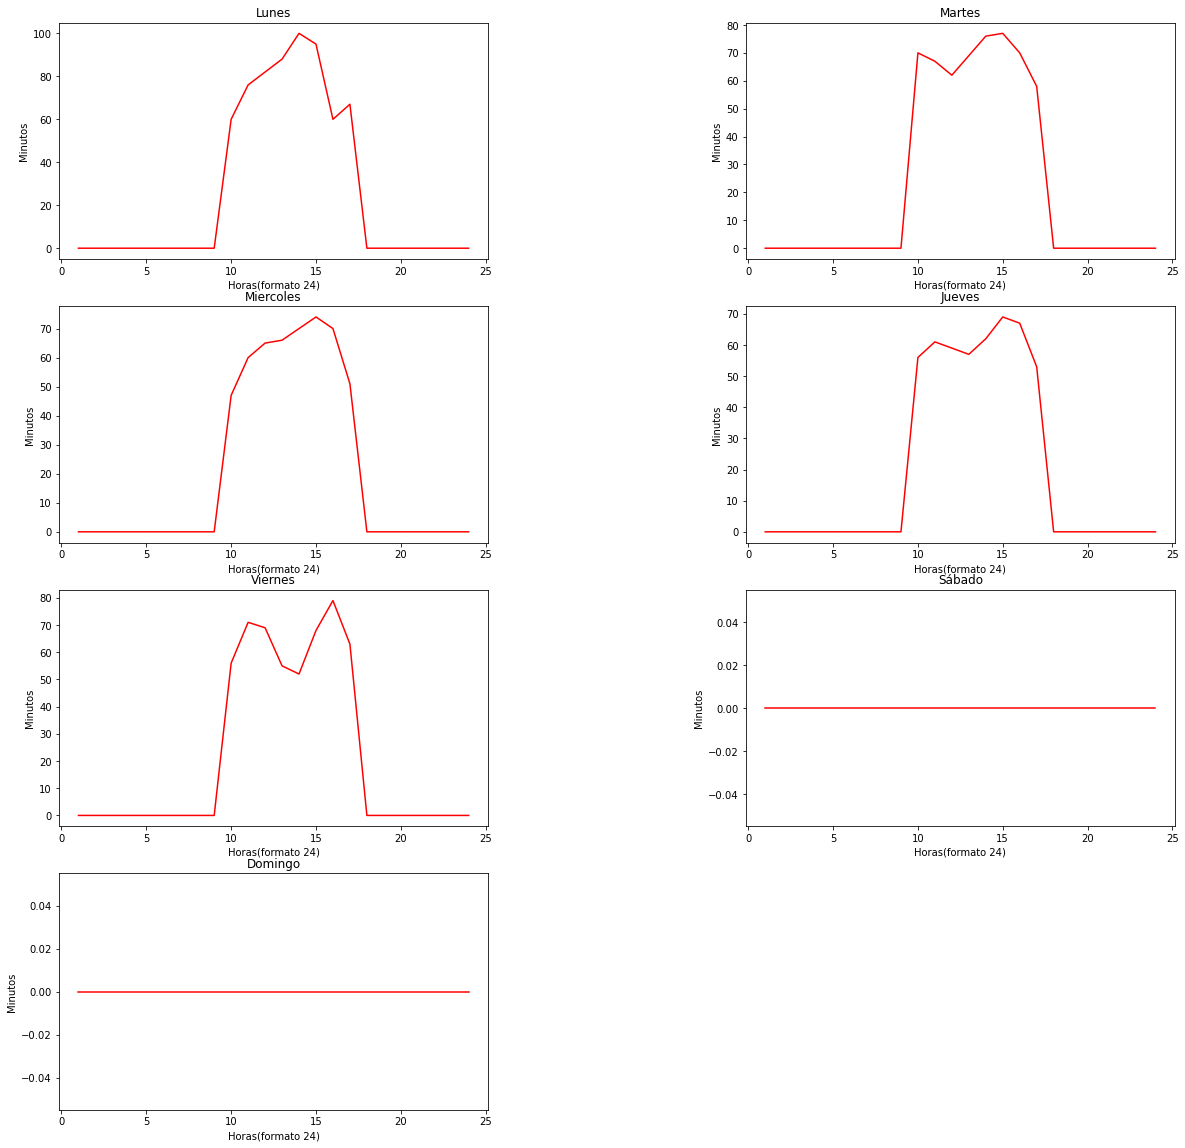

Las coordenadas de este punto son: 25.67953221 latitud  -100.31338704 longitud.


In [57]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p9[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p9[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p9[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p9[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p9[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p9[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p9[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][8],'latitud ',buena_ubicacion['longitud'][8],'longitud.')

### Punto #10

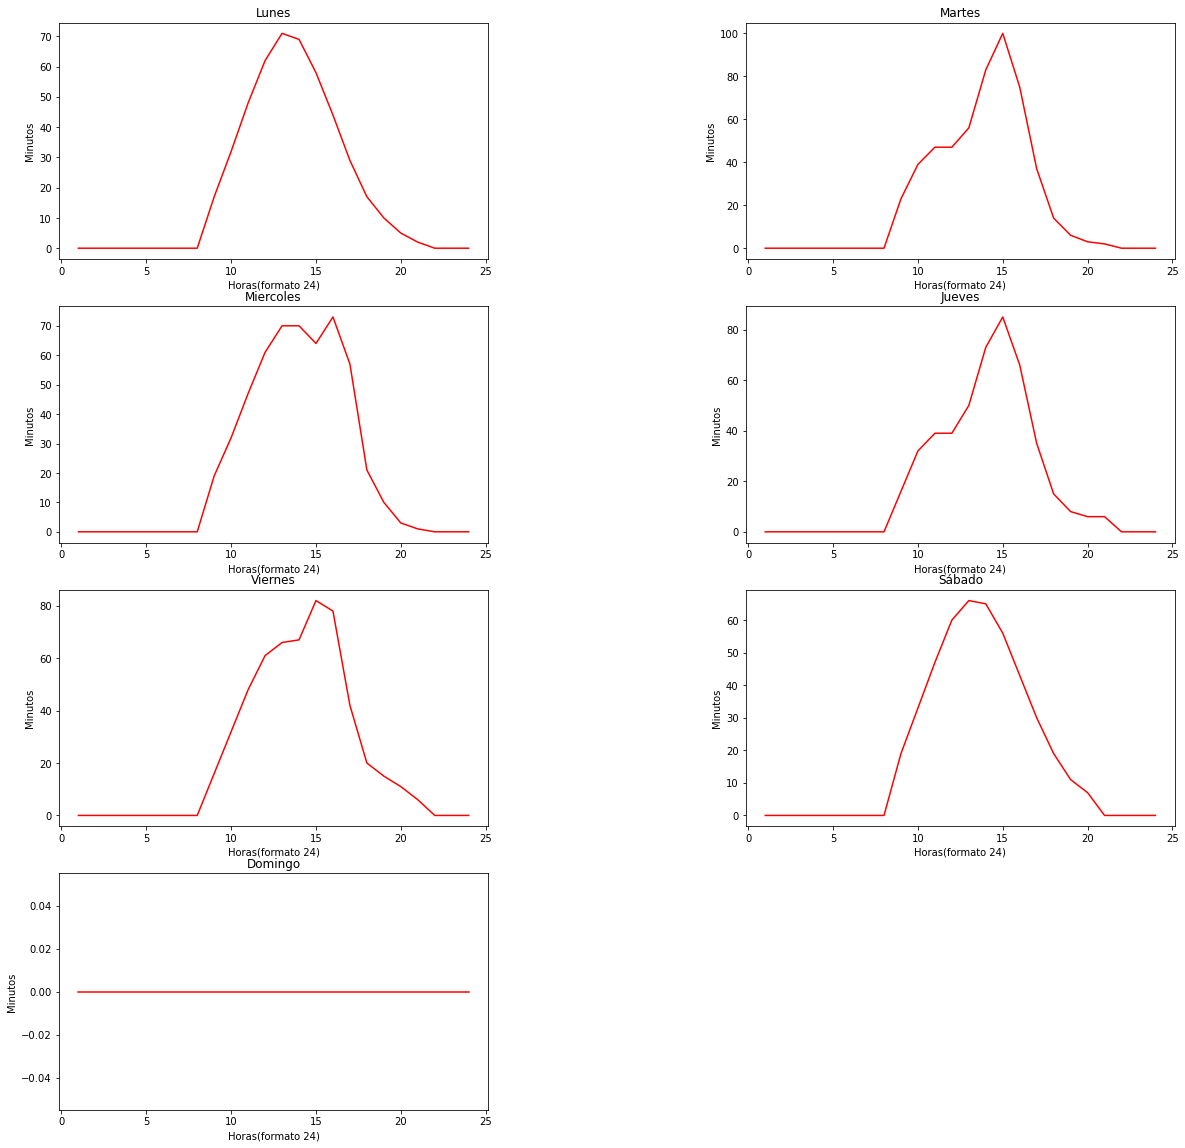

Las coordenadas de este punto son: 25.66852024 latitud  -100.31508961 longitud.


In [58]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p10[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p10[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p10[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p10[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p10[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p10[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p10[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][9],'latitud ',buena_ubicacion['longitud'][9],'longitud.')

### Punto #11

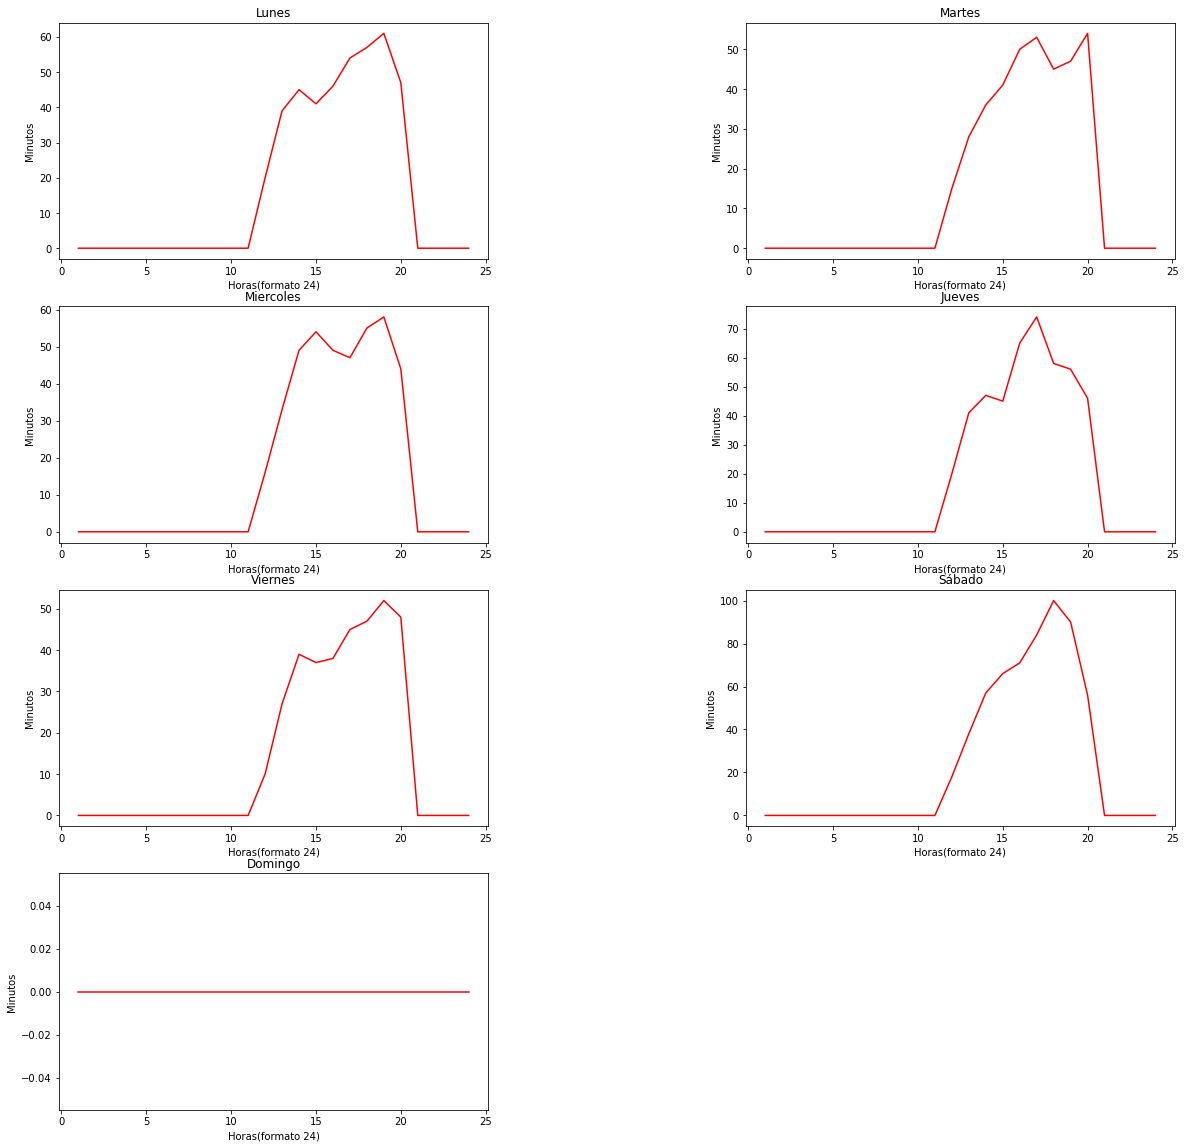

Las coordenadas de este punto son: 25.64806335 latitud  -100.33797825 longitud.


In [59]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p11[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p11[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p11[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p11[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p11[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p11[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p11[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][10],'latitud ',buena_ubicacion['longitud'][10],'longitud.')

### Punto #12

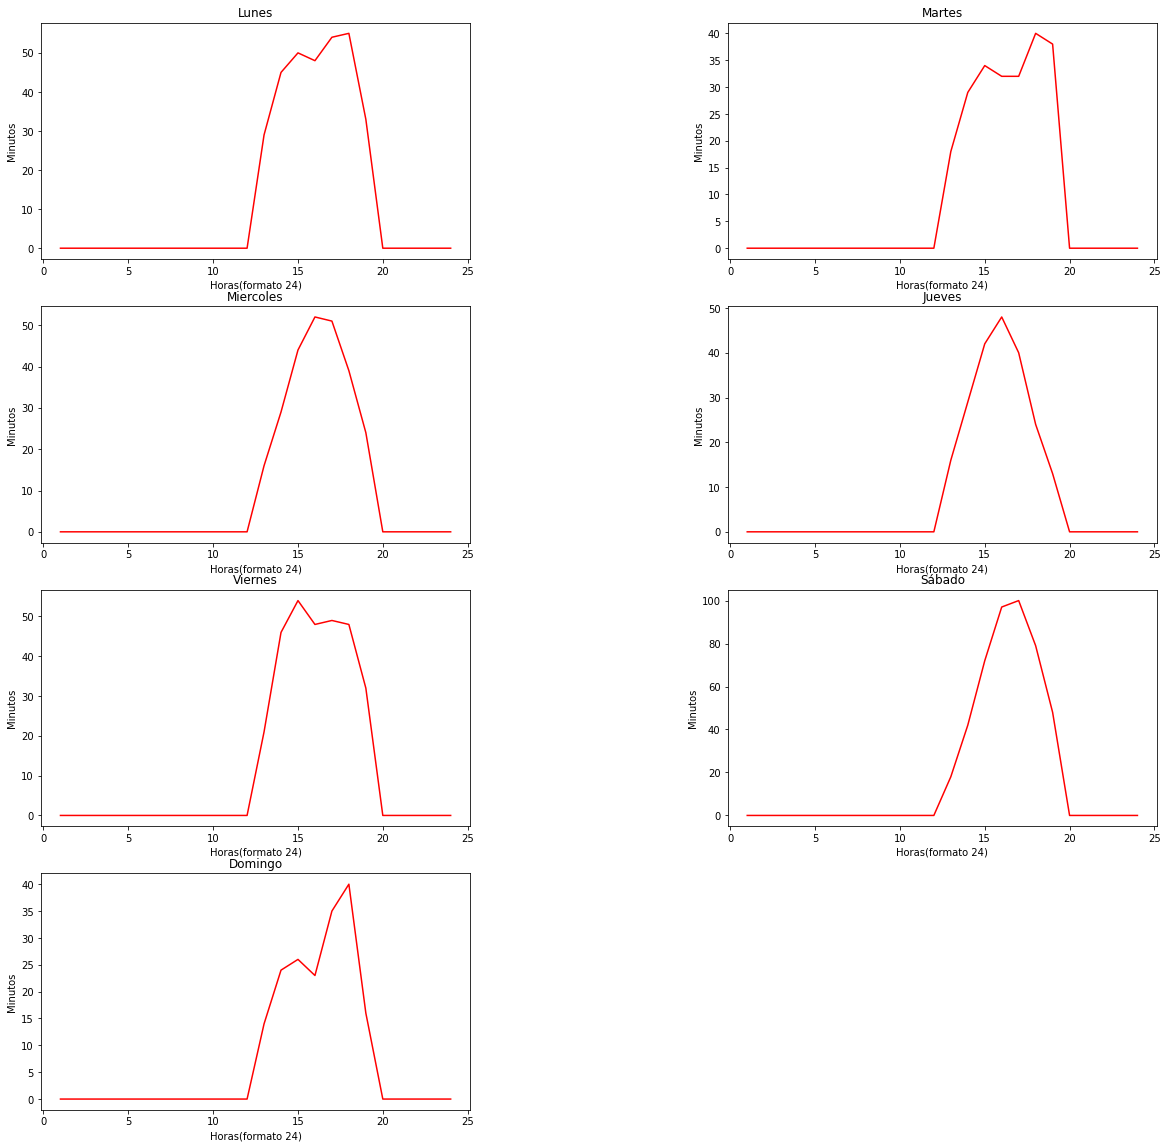

Las coordenadas de este punto son: 25.66852024 latitud  -100.31508961 longitud.


In [60]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p12[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p12[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p12[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p12[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p12[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p12[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p12[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][11],'latitud ',buena_ubicacion['longitud'][11],'longitud.')

### Punto #13

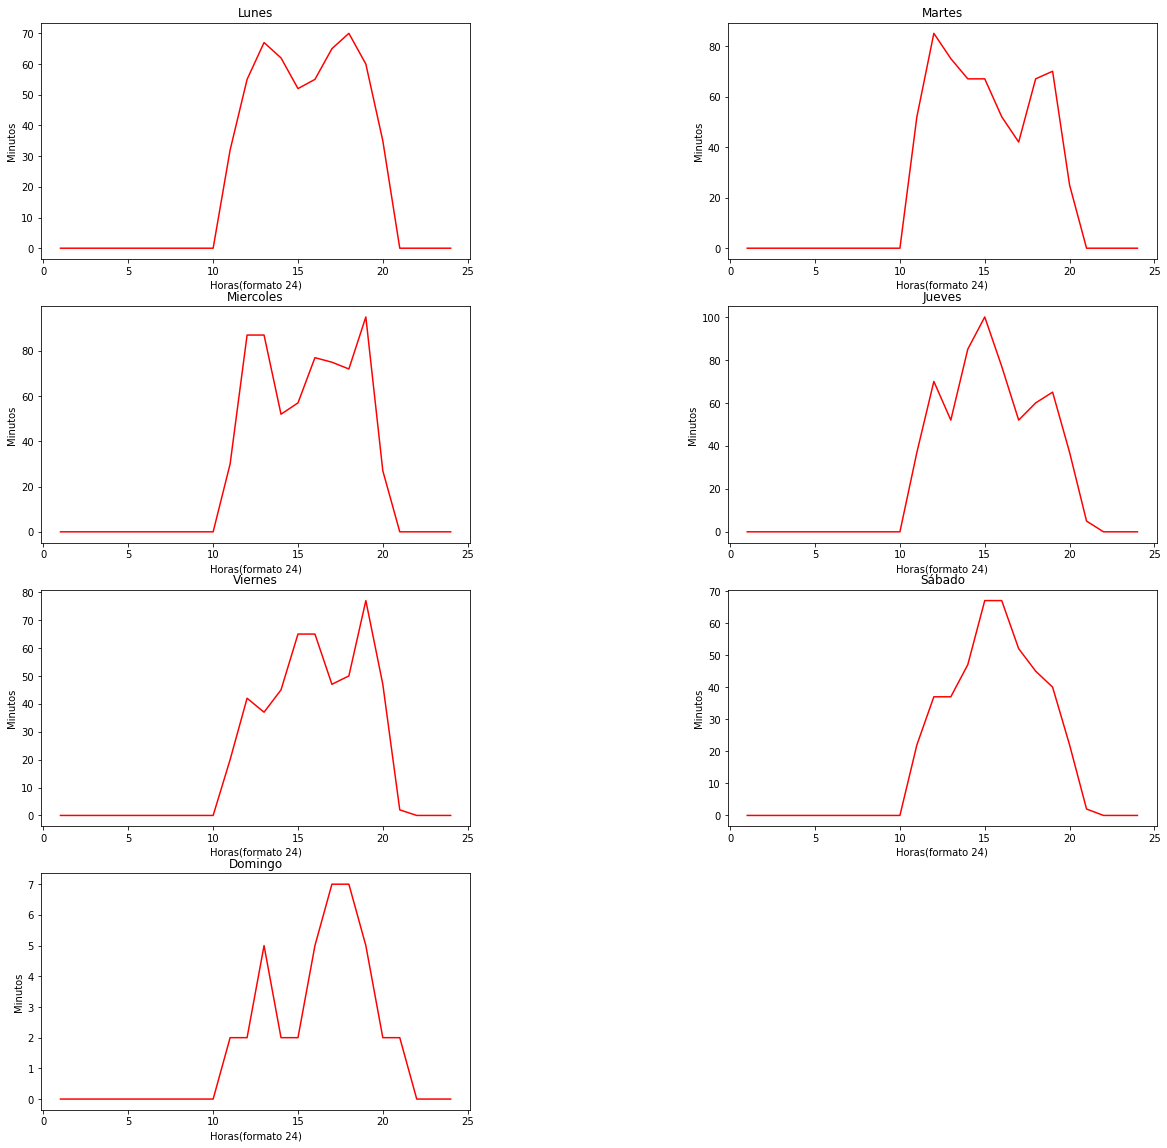

Las coordenadas de este punto son: 25.66716115 latitud  -100.31116401 longitud.


In [61]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p13[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p13[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p13[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p13[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p13[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p13[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p13[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][12],'latitud ',buena_ubicacion['longitud'][12],'longitud.')

### Punto #14

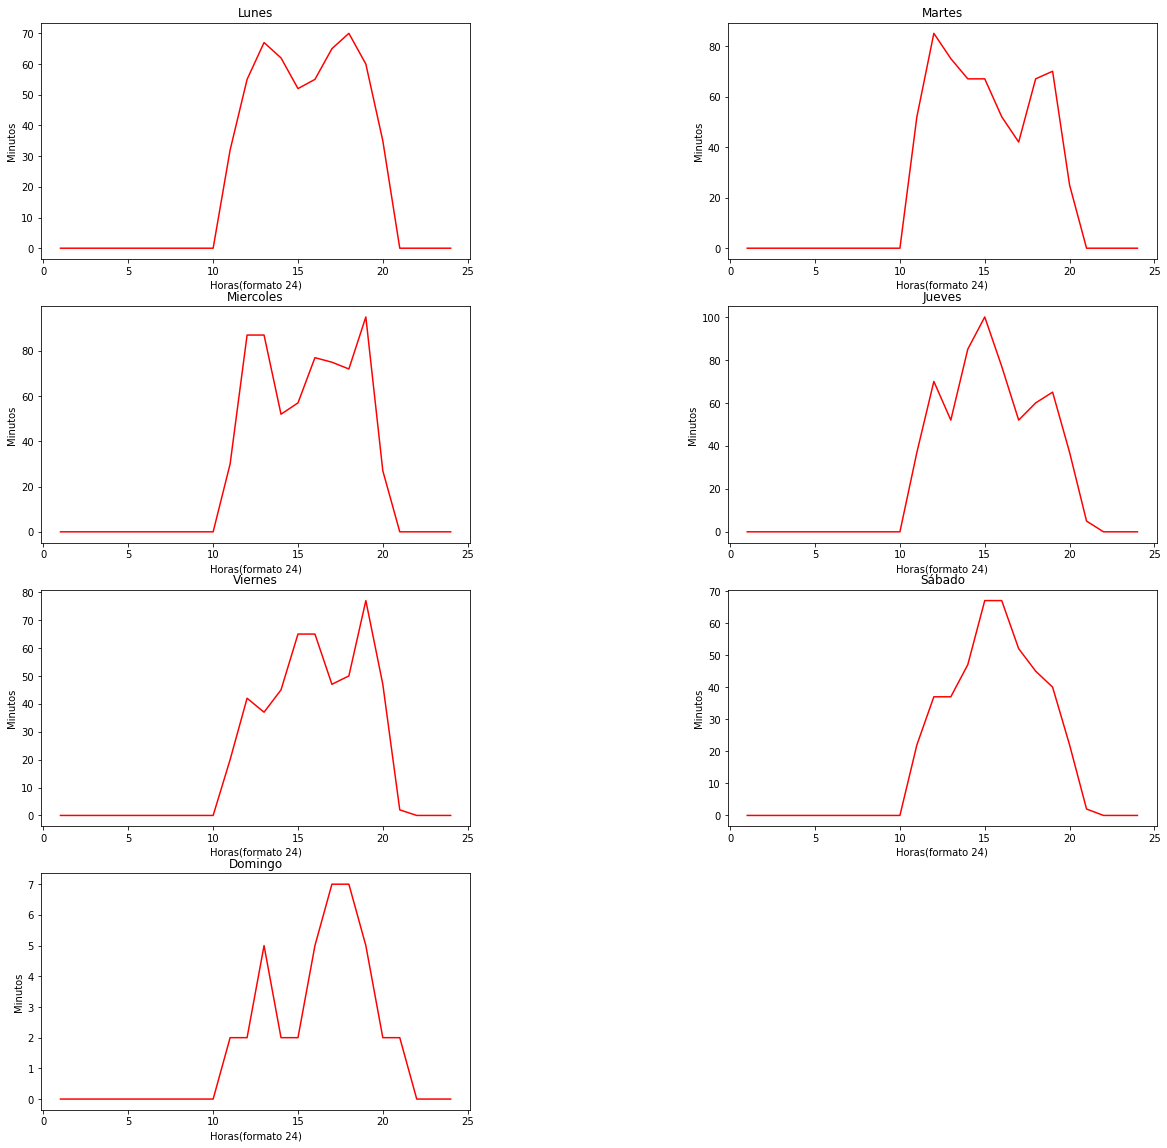

Las coordenadas de este punto son: 25.66716115 latitud  -100.31116401 longitud.


In [62]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p14[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p14[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p14[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p14[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p14[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p14[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p14[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][13],'latitud ',buena_ubicacion['longitud'][13],'longitud.')

### Punto #15

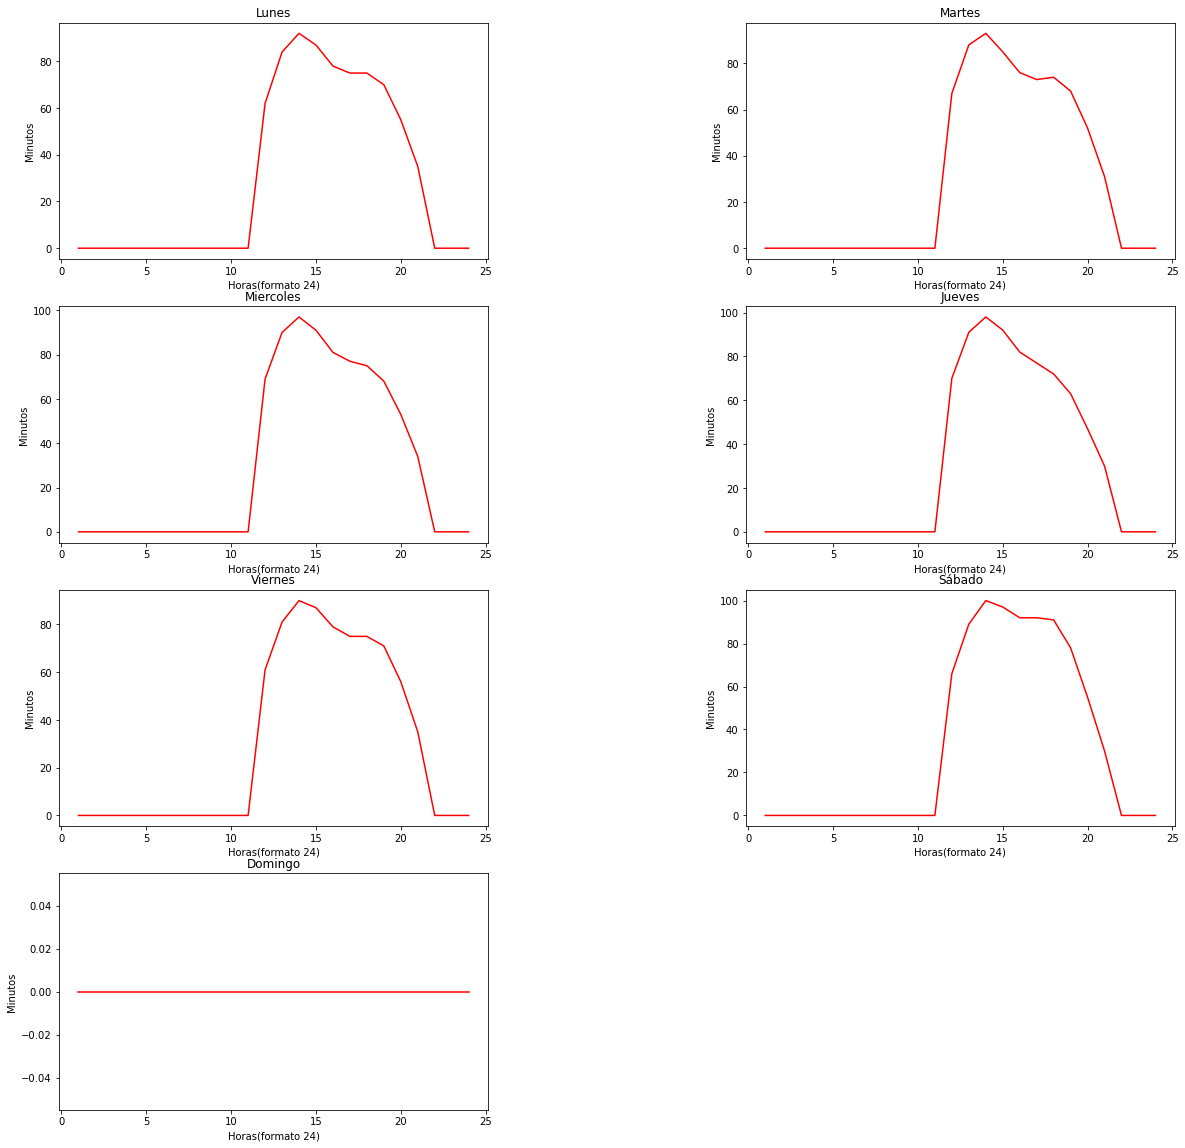

Las coordenadas de este punto son: 25.66760141 latitud  -100.32641874 longitud.


In [63]:
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(20,20))

ax1 = plt.subplot(4,2,1)
ax1.plot(list(range(1,25)), p15[0]['data'],color='red')
ax1.set_title('Lunes') 
ax1.set_xlabel('Horas(formato 24)')
ax1.set_ylabel('Minutos')

ax2 = plt.subplot(4,2,2)
ax2.plot(list(range(1,25)), p15[1]['data'],color='red')
ax2.set_title('Martes') 
ax2.set_xlabel('Horas(formato 24)')
ax2.set_ylabel('Minutos')

ax3 = plt.subplot(4,2,3)
ax3.plot(list(range(1,25)), p15[2]['data'],color='red')
ax3.set_title('Miercoles') 
ax3.set_xlabel('Horas(formato 24)')
ax3.set_ylabel('Minutos')

ax4 = plt.subplot(4,2,4)
ax4.plot(list(range(1,25)), p15[3]['data'],color='red')
ax4.set_title('Jueves') 
ax4.set_xlabel('Horas(formato 24)')
ax4.set_ylabel('Minutos')

ax5 = plt.subplot(4,2,5)
ax5.plot(list(range(1,25)), p15[4]['data'],color='red')
ax5.set_title('Viernes') 
ax5.set_xlabel('Horas(formato 24)')
ax5.set_ylabel('Minutos')

ax6 = plt.subplot(4,2,6)
ax6.plot(list(range(1,25)), p15[5]['data'],color='red')
ax6.set_title('Sábado') 
ax6.set_xlabel('Horas(formato 24)')
ax6.set_ylabel('Minutos')

ax7 = plt.subplot(4,2,7)
ax7.plot(list(range(1,25)), p15[6]['data'],color='red')
ax7.set_title('Domingo') 
ax7.set_xlabel('Horas(formato 24)')
ax7.set_ylabel('Minutos')

plt.subplots_adjust(wspace=0.6)
plt.show()
print('Las coordenadas de este punto son:',buena_ubicacion['latitud'][14],'latitud ',buena_ubicacion['longitud'][14],'longitud.')

### Fuentes:

-https://www.oecd.org/acerca/

-https://inegi.org.mx/programas/dutih/2017/?ps=Microdatos#Microdatos

-https://www.inegi.org.mx/programas/dutih/2019/#Datos_abiertos

-https://datamexico.org/

-https://python.gotrained.com/google-places-api-extracting-location-data-reviews/

-https://pypi.org/project/LivePopularTimes/

-https://mexicocomovamos.mx/wp-content/uploads/2021/02/indice-de-progreso-social-mexico-2020.pdf

-https://www.elfinanciero.com.mx/economia/nuevo-leon-queretaro-y-aguascalientes-los-estados-con-el-mejor-nivel-en-desarrollo-social-del-pais

-https://www.visocym.com/base-de-datos/por-estado/venta-base-de-datos-de-nuevo-leon/